In [2]:
# 1. Dataset manipulation
import pandas as pd
from pandas import DataFrame
import numpy as np

# 2. Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

# 3. Shuffling the data
import random
# 4. Scaling the data
from sklearn.preprocessing import StandardScaler
# 5. train_test_split
from sklearn.model_selection import train_test_split

<font color=black size=5 >3.Data Exploration<br/>  
    
<font color=black size=4 >**3.1 Descriptive statistics**<br/>    
    
<font color=black size=3 >&emsp; **1) Overview**<br/>
<font color=black size=2 >&emsp;&emsp;— The data set has 932335 rows and 42 features + 'activityID'/ 'activity_name'column (traget feature).<br/>
&emsp;&emsp;— Categorical columns: 'subjectID'.<br/>
&emsp;&emsp;— Continous columns: All other columns except 'subjectID' and traget feature.

In [3]:
df= pd.read_csv("0708Physical activity.dat")
df['subjectID']=df['subjectID'].astype(str)
df['activityID']=df['activityID'].astype(str)
df

timestamp subjectID activityID activity_name  heart rate  h_temp  \
0           38.16         1          1         lying       101.0  30.375   
1           38.17         1          1         lying       101.0  30.375   
2           38.18         1          1         lying       101.0  30.375   
3           38.19         1          1         lying       101.0  30.375   
4           38.20         1          1         lying       101.0  30.375   
...           ...       ...        ...           ...         ...     ...   
932330      94.56         9         24  rope jumping       162.0  25.125   
932331      94.57         9         24  rope jumping       162.0  25.125   
932332      94.58         9         24  rope jumping       162.0  25.125   
932333      94.59         9         24  rope jumping       162.0  25.125   
932334      94.60         9         24  rope jumping       162.0  25.125   

        h_acc_16X  h_acc_16Y  h_acc_16Z  h_acc_ma  ...  a_acc_16Z  a_acc_ma  \
0         2.48446    8.30637    4.62928  9.828457  ...   0.056250  9.851814   
1         2.41664    7.70294    4.97669  9.483822  ...  -0.136998  9.839759   
2         2.56915    7.32339    5.09572  9.284338  ...   0.017495  9.821095   
3         2.29091    6.95304    5.86255  9.378834  ...  -0.059944  9.811658   
4         2.27665    7.07285    6.51621  9.882780  ...  -0.019882  9.982500   
...           ...        ...        ...       ...  ...        ...       ...   
932330    4.22327    6.14412    6.20212  9.698067  ...  -2.067190  9.814550   
932331    4.07559    6.25977    6.27649  9.756510  ...  -2.221830  9.834985   
932332    4.07586    6.10835    6.31549  9.685556  ...  -2.027190  9.922957   
932333    4.07345    5.95626    6.27748  9.564350  ...  -1.949750  9.918749   
932334    4.10910    6.03118    6.20079  9.576515  ...  -2.103780  9.981167   

        a_gyro_ma   a_gyroX   a_gyroY   a_gyroZ   a_magX     a_magY  \
0        0.011931 -0.006726 -0.009481  0.002686 -61.1030 -37.087600   
1        0.027181  0.025056 -0.000207 -0.010535 -61.4511 -36.301600   
2        0.042027  0.006158 -0.029808 -0.028981 -61.2282 -36.846400   
3        0.051196  0.006871 -0.039702  0.031584 -61.6681 -36.952600   
4        0.041121  0.027545  0.021204  0.021969 -61.5491 -36.752400   
...           ...       ...       ...       ...      ...        ...   
932330   0.030596  0.013664 -0.013217  0.023973 -46.1675  -0.941846   
932331   0.019076  0.006909  0.017599 -0.002539 -45.5386  -0.587394   
932332   0.027878  0.008121 -0.023196 -0.013159 -46.0495  -0.561914   
932333   0.038206  0.014309  0.012105 -0.033293 -45.6573  -0.708540   
932334   0.070332  0.065855 -0.001829 -0.024622 -46.0304  -0.946169   

           a_magZ   a_mag_ma  
0      -58.124500  92.127760  
1      -58.237000  92.117273  
2      -59.358700  92.897820  
3      -58.489800  92.679587  
4      -57.250800  91.742491  
...           ...        ...  
932330  -0.313187  46.178168  
932331  -0.453218  45.544643  
932332  -0.455045  46.055176  
932333   0.113833  45.662939  
932334   0.538293  46.043270  

[932335 rows x 44 columns]

In [6]:
stat = df.describe().transpose()
stat.reset_index(inplace=True)
stat = stat[stat['index'] != 'timestamp']
stat

index     count        mean        std        min        25%  \
1   heart rate  932335.0  109.976163  26.171303  66.000000  89.000000   
2       h_temp  932335.0   33.264764   1.777735  24.875000  32.125000   
3    h_acc_16X  932335.0   -4.467698   5.731272 -29.691300  -8.646650   
4    h_acc_16Y  932335.0    2.726219   5.599264 -24.976100  -0.336134   
5    h_acc_16Z  932335.0    3.588505   3.579592 -17.997400   1.113030   
6     h_acc_ma  932335.0   10.376133   3.101365   0.217626   9.328910   
7      h_gyroX  932335.0    0.016722   1.161265  -4.999180  -0.369719   
8      h_gyroY  932335.0    0.049513   0.833255  -5.499740  -0.211232   
9      h_gyroZ  932335.0    0.001676   1.570585  -7.499650  -0.429798   
10   h_gyro_ma  932335.0    1.473287   1.530276   0.000519   0.184411   
11      h_magX  932335.0   18.393962  25.868054 -51.969900  -0.242864   
12      h_magY  932335.0  -12.580879  24.577838 -99.197600 -28.777050   
13      h_magZ  932335.0  -24.969695  20.041769 -99.751300 -39.479700   
14    h_mag_ma  932335.0   51.221767  13.089304  10.295520  42.869811   
15      c_temp  932335.0   36.550379   1.551928  31.937500  35.625000   
16   c_acc_16X  932335.0    0.293664   1.489566  -7.498410  -0.481683   
17   c_acc_16Y  932335.0    7.736774   4.173263 -17.808700   5.516335   
18   c_acc_16Z  932335.0   -1.900796   4.783465 -14.982000  -4.696700   
19    c_acc_ma  932335.0    9.890737   2.871703   0.061476   9.422485   
20     c_gyroX  932335.0   -0.015845   0.345686  -1.999690  -0.122593   
21     c_gyroY  932335.0    0.008495   0.522787  -3.513330  -0.138392   
22     c_gyroZ  932335.0   -0.018729   0.326544  -1.999000  -0.137570   
23   c_gyro_ma  932335.0    0.497770   0.502329   0.000448   0.097204   
24      c_magX  932335.0    4.366165  17.693729 -59.974100  -7.125050   
25      c_magY  932335.0  -31.436070  18.557550 -79.995300 -40.994900   
26      c_magZ  932335.0    6.346179  23.082250 -59.864900  -8.409780   
27    c_mag_ma  932335.0   45.334386  13.512854  13.342664  36.981668   
28      a_temp  932335.0   33.919655   1.001706  30.125000  33.625000   
29   a_acc_16X  932335.0    9.179888   5.572376 -17.989700   8.136635   
30   a_acc_16Y  932335.0   -0.423055   5.080315 -24.979900  -2.478090   
31   a_acc_16Z  932335.0   -2.729154   2.777503 -19.995500  -3.883140   
32    a_acc_ma  932335.0   11.557100   4.786072   0.097642   9.869456   
33   a_gyro_ma  932335.0    1.372820   1.844105   0.000589   0.059668   
34     a_gyroX  932335.0   -0.003163   0.986295  -4.999660  -0.182654   
35     a_gyroY  932335.0   -0.004333   0.640737  -3.399820  -0.092330   
36     a_gyroZ  932335.0    0.042697   1.974889 -10.955100  -0.335751   
37      a_magX  932335.0  -34.077707  18.583487 -99.986600 -43.582900   
38      a_magY  932335.0    2.638415  23.063383 -79.992200 -13.919000   
39      a_magZ  932335.0   16.322070  20.289674 -64.971200   1.769330   
40    a_mag_ma  932335.0   49.524241  16.460446   1.156408  39.546877   

           50%         75%         max  
1   109.000000  126.000000  202.000000  
2    33.875000   34.625000   35.500000  
3    -4.881680   -0.553380   17.929000  
4     3.315180    6.453060   29.861400  
5     3.440460    6.379440   17.999200  
6     9.770923   11.040948   29.999726  
7    -0.006226    0.342075    6.994970  
8     0.006531    0.258885    5.990530  
9    -0.005840    0.381423    7.498280  
10    0.987983    2.270617    9.899671  
11   21.463100   39.177200   99.444000  
12  -14.559400    4.425820   69.979100  
13  -24.820200  -12.447850   49.990000  
14   49.932577   59.194416   99.998478  
15   37.062500   37.687500   38.562500  
16    0.412915    1.089275    7.496940  
17    8.998610    9.717080   34.816800  
18   -2.118410    0.275033    9.999070  
19    9.827966   10.344456   34.995390  
20   -0.000095    0.099671    1.999520  
21    0.001368    0.157545    3.747590  
22   -0.015560    0.092571    1.999630  
23    0.375345    0.697297    3.992527  
24    3.293670   14.440700   66

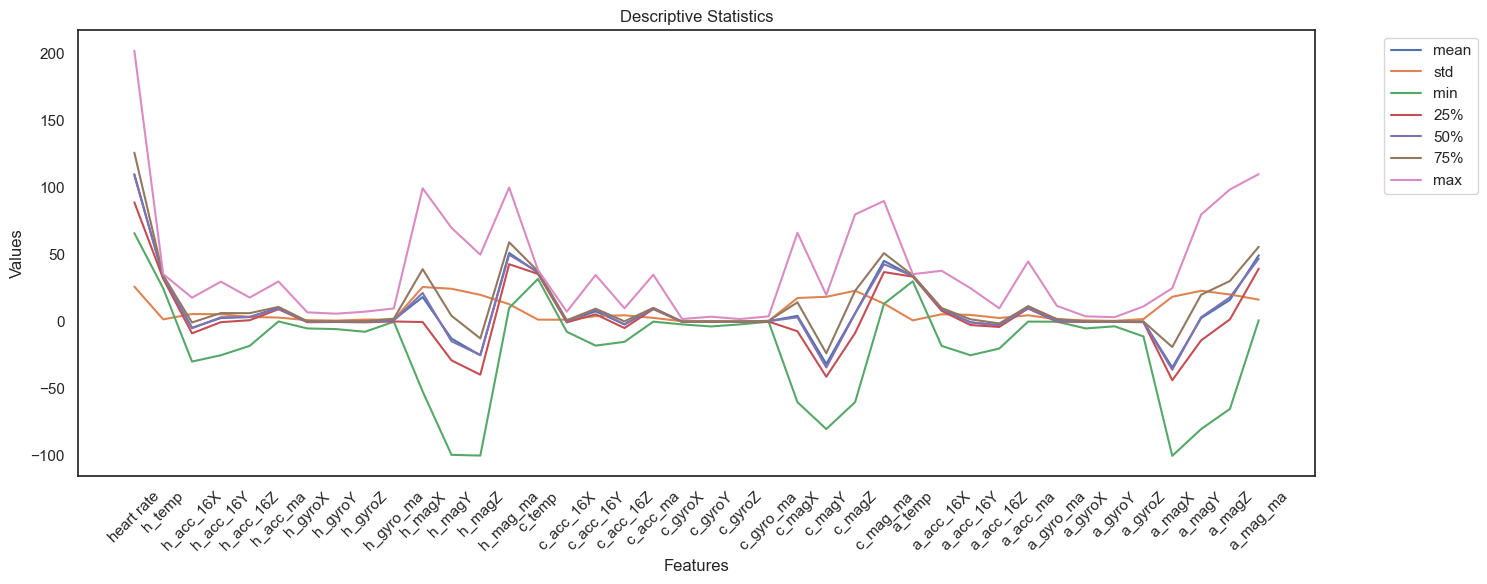

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=stat, x='index', y='mean', label='mean')
sns.lineplot(data=stat, x='index', y='std', label='std')
sns.lineplot(data=stat, x='index', y='min', label='min')
sns.lineplot(data=stat, x='index', y='25%', label='25%')
sns.lineplot(data=stat, x='index', y='50%', label='50%')
sns.lineplot(data=stat, x='index', y='75%', label='75%')
sns.lineplot(data=stat, x='index', y='max', label='max')
plt.title('Descriptive Statistics')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
mea = df.groupby('activity_name').mean(numeric_only='TRUE')
mea.reset_index(inplace=True)
mea

activity_name    timestamp  heart rate     h_temp  h_acc_16X  \
0      Nordic walking  3049.511954  126.923159  31.954028  -4.542250   
1    ascending stairs  1891.830205  132.727485  33.967827  -8.737057   
2             cycling  3185.994292  124.158509  31.603435  -4.457061   
3   descending stairs  1997.980130  130.584463  33.829686  -6.561898   
4             ironing  1034.425571   90.889366  34.581219  -2.374890   
5               lying   189.501722   79.330418  33.489743   4.014322   
6        rope jumping  3276.293943  160.744444  29.530700  -2.100332   
7             running  3469.901744  156.320385  31.739850  -5.824527   
8             sitting   483.270858   82.072537  33.911469  -1.240058   
9            standing   721.342261   90.542401  34.234664  -7.124972   
10    vacuum cleaning  1380.675089  107.939443  34.544367  -6.857063   
11            walking  2540.969833  118.577732  33.031378  -9.839068   

    h_acc_16Y  h_acc_16Z   h_acc_ma   h_gyroX   h_gyroY  ...  a_acc_16Z  \
0    2.403363   2.392095  10.130459 -0.028358  0.045061  ...  -3.225503   
1    2.918305   1.487799  10.572743 -0.286822  0.174540  ...  -2.664853   
2    3.394634   7.366427  10.448319 -0.022236 -0.012606  ...  -1.402079   
3    3.333305   2.414846  10.141118  0.318486 -0.117132  ...  -2.382466   
4    2.208905   5.484414   9.988077  0.026554  0.029402  ...  -1.933320   
5    2.854397   6.130792   9.705670  0.000309  0.004372  ...  -5.335626   
6    4.358166  -0.463424  11.014568  0.401781  0.384766  ...  -1.566712   
7    3.022641   1.103929  13.039411  0.010513  0.435372  ...  -3.864898   
8    2.542402   4.349529   9.750999 -0.000242  0.004875  ...  -3.227489   
9    2.808894   2.148550   9.789464  0.007599  0.002798  ...  -2.010027   
10   2.550619   2.907400  10.779063  0.033761 -0.005913  ...  -1.505717   
11   2.123486   1.834321  11.023966  0.022523  0.058876  ...  -3.264512   

     a_acc_ma  a_gyro_ma   a_gyroX   a_gyroY   a_gyroZ     a_magX     a_magY  \
0   13.941407   3.055266 -0.033733 -0.098494  0.083826 -38.982025   1.596777   
1   11.787812   1.799067  0.292662  0.096377 -0.033133 -37.046317  -1.281294   
2   10.628463   1.264270  0.061419  0.025096 -0.004682 -40.184950  -4.126961   
3   13.291059   2.435181 -0.343633 -0.131587  0.176632 -38.666309  -3.947575   
4    9.981960   0.291850  0.009941 -0.005453  0.002957 -42.738368   1.793744   
5   10.107464   0.076902  0.009166 -0.005534  0.003462 -16.914530  22.604504   
6   11.723059   1.918742 -0.129136  0.057197  0.209494 -41.779564  -8.999529   
7   17.032809   4.048264 -0.019712  0.270243  0.385561 -36.665565  -9.304009   
8   10.003069   0.091636  0.006336 -0.005504  0.004607 -32.232280   7.672412   
9    9.971640   0.133815 -0.000796 -0.003715  0.003942 -32.300085   1.505743   
10  10.256493   0.802395 -0.021965  0.006774  0.005889 -21.186012   3.888179   
11  13.951888   3.017049 -0.015024 -0.073356  0.022282 -37.929975   1.037420   

       a_magZ   a_mag_ma  
0   12.056670  50.163781  
1   12.965658  53.730328  
2   12.681141  50.433496  
3   16.796364  56.106095  
4   25.277812  56.380225  
5    5.684352  39.566472  
6   23.188204  55.347348  
7   12.362790  52.168689  
8   24.360602  49.345028  
9   24.542291  51.561093  
10  12.828327  39.457355  
11  13.693733  49.387416  

[12 rows x 42 columns]

In [7]:
activity=df['activity_name'].unique()

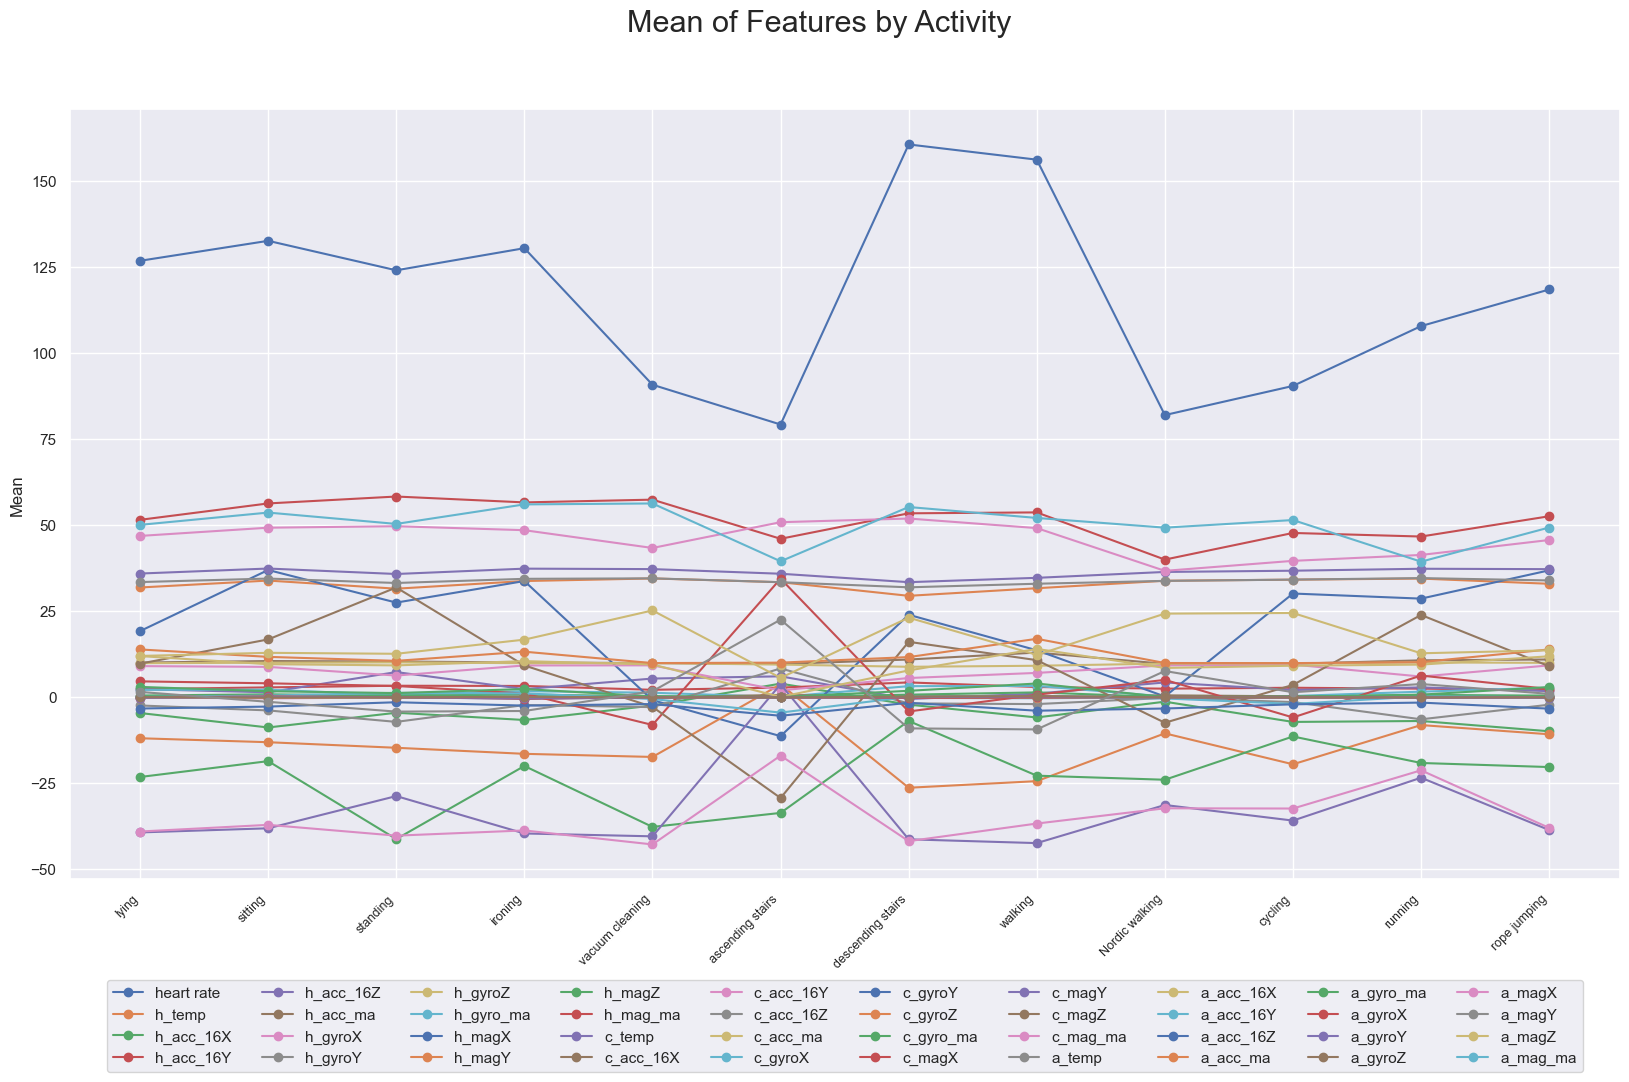

In [15]:
avg_values = df.groupby('activity_name').mean(numeric_only='TRUE')
avg_values = avg_values.drop("timestamp", axis=1)
plt.figure(figsize=(20, 10)) 
for col in avg_values.columns:
    plt.plot(activity, avg_values[col], marker='o') 

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylabel('Mean')
plt.legend(avg_values.columns, loc='lower center', bbox_to_anchor=(0.5, -0.26), ncol=10)

plt.suptitle('Mean of Features by Activity',fontsize=22)
  
plt.show()

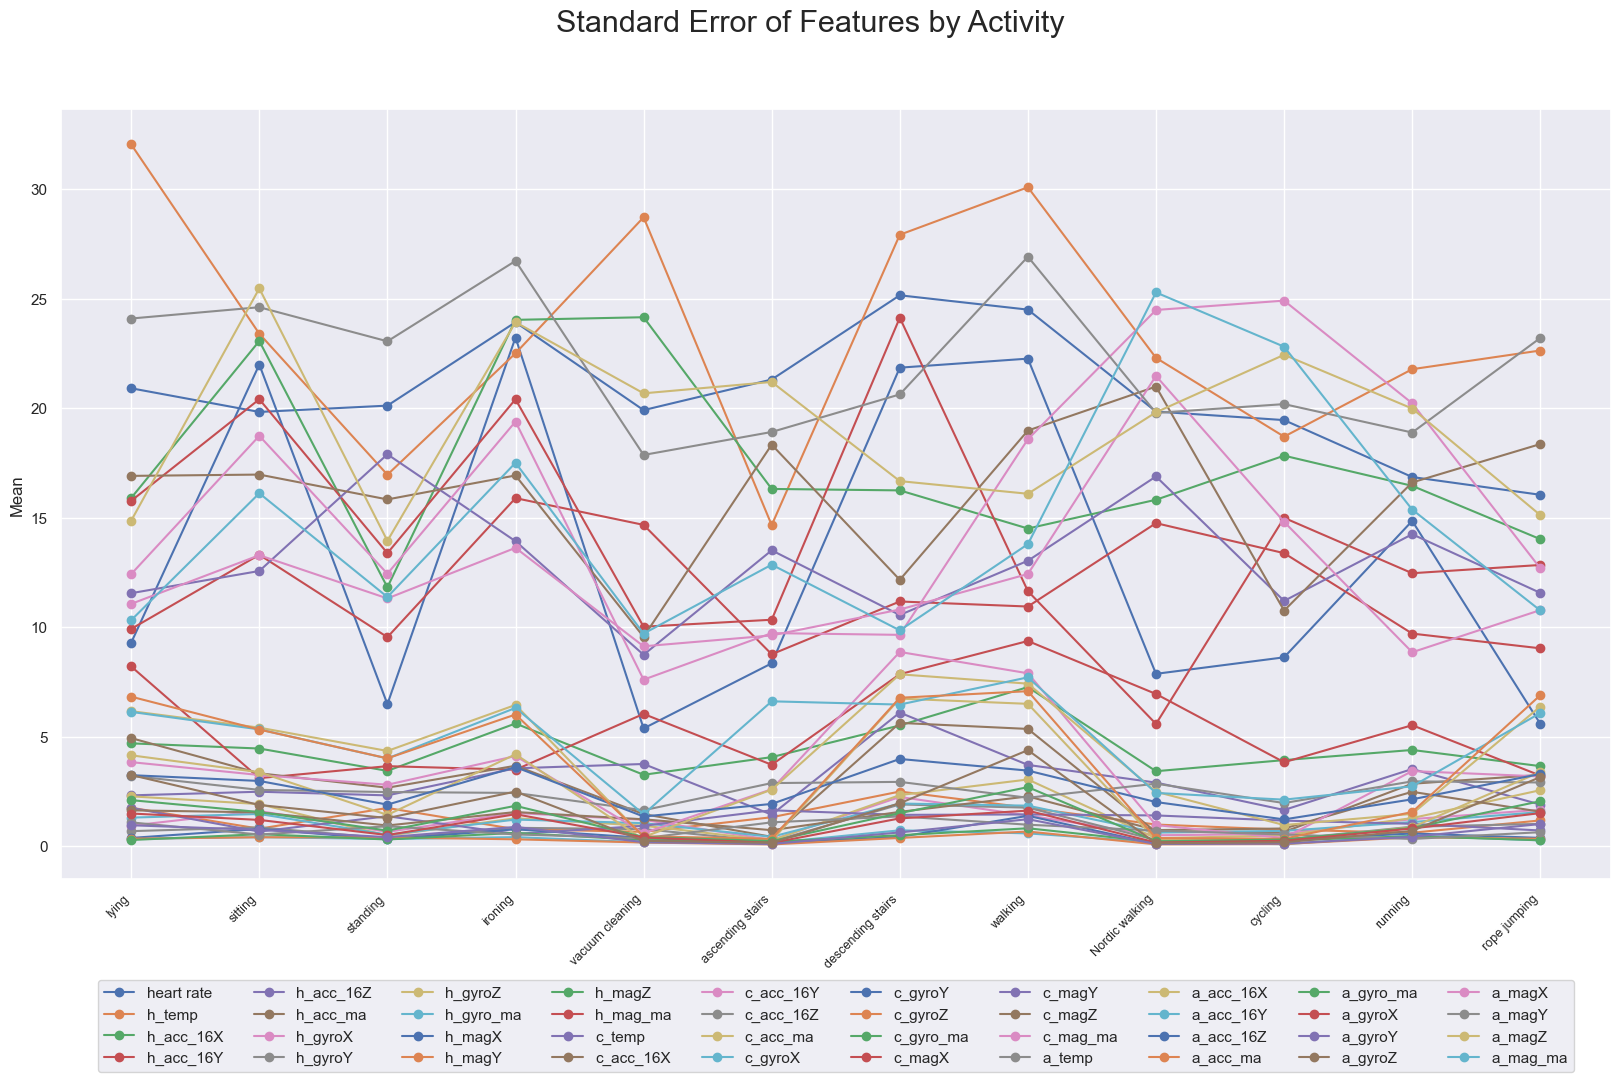

In [16]:
std_val = df.groupby('activity_name').std(numeric_only=True)
std_val  = std_val .drop("timestamp", axis=1)
plt.figure(figsize=(20, 10)) 
for col in std_val.columns:
    plt.plot(activity, std_val[col], marker='o') 

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylabel('Mean')
plt.legend(std_val.columns, loc='lower center', bbox_to_anchor=(0.5, -0.26), ncol=10)

plt.suptitle('Standard Error of Features by Activity',fontsize=22)
  
plt.show()

<font color=black size=3 >&emsp;**2) Sample Size**<br/> 
<font color=black size=2 > &emsp;&emsp;&emsp;**subjectID**: Unequal sample size within subjects<br/>
 &emsp;&emsp;&emsp; – Subject 109 has the least data points(4497);<br/>
 &emsp;&emsp;&emsp; – Subject 101,102,105,108 have nearly equal sample size;<br/>

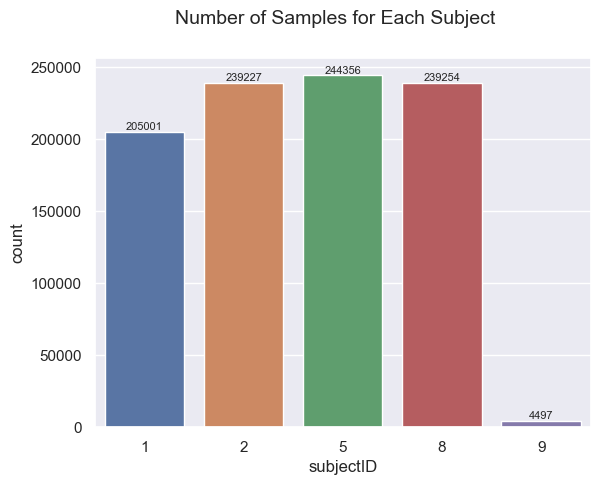

In [19]:
subject_counts=df.groupby(['subjectID']).size().reset_index(name='count')
sns.barplot(data=subject_counts, x='subjectID',y='count')
for index, row in subject_counts.iterrows():
    plt.annotate(row['count'], (index, row['count']), ha='center', va='bottom', fontsize=8)
plt.suptitle('Number of Samples for Each Subject',fontsize=14)
plt.show()

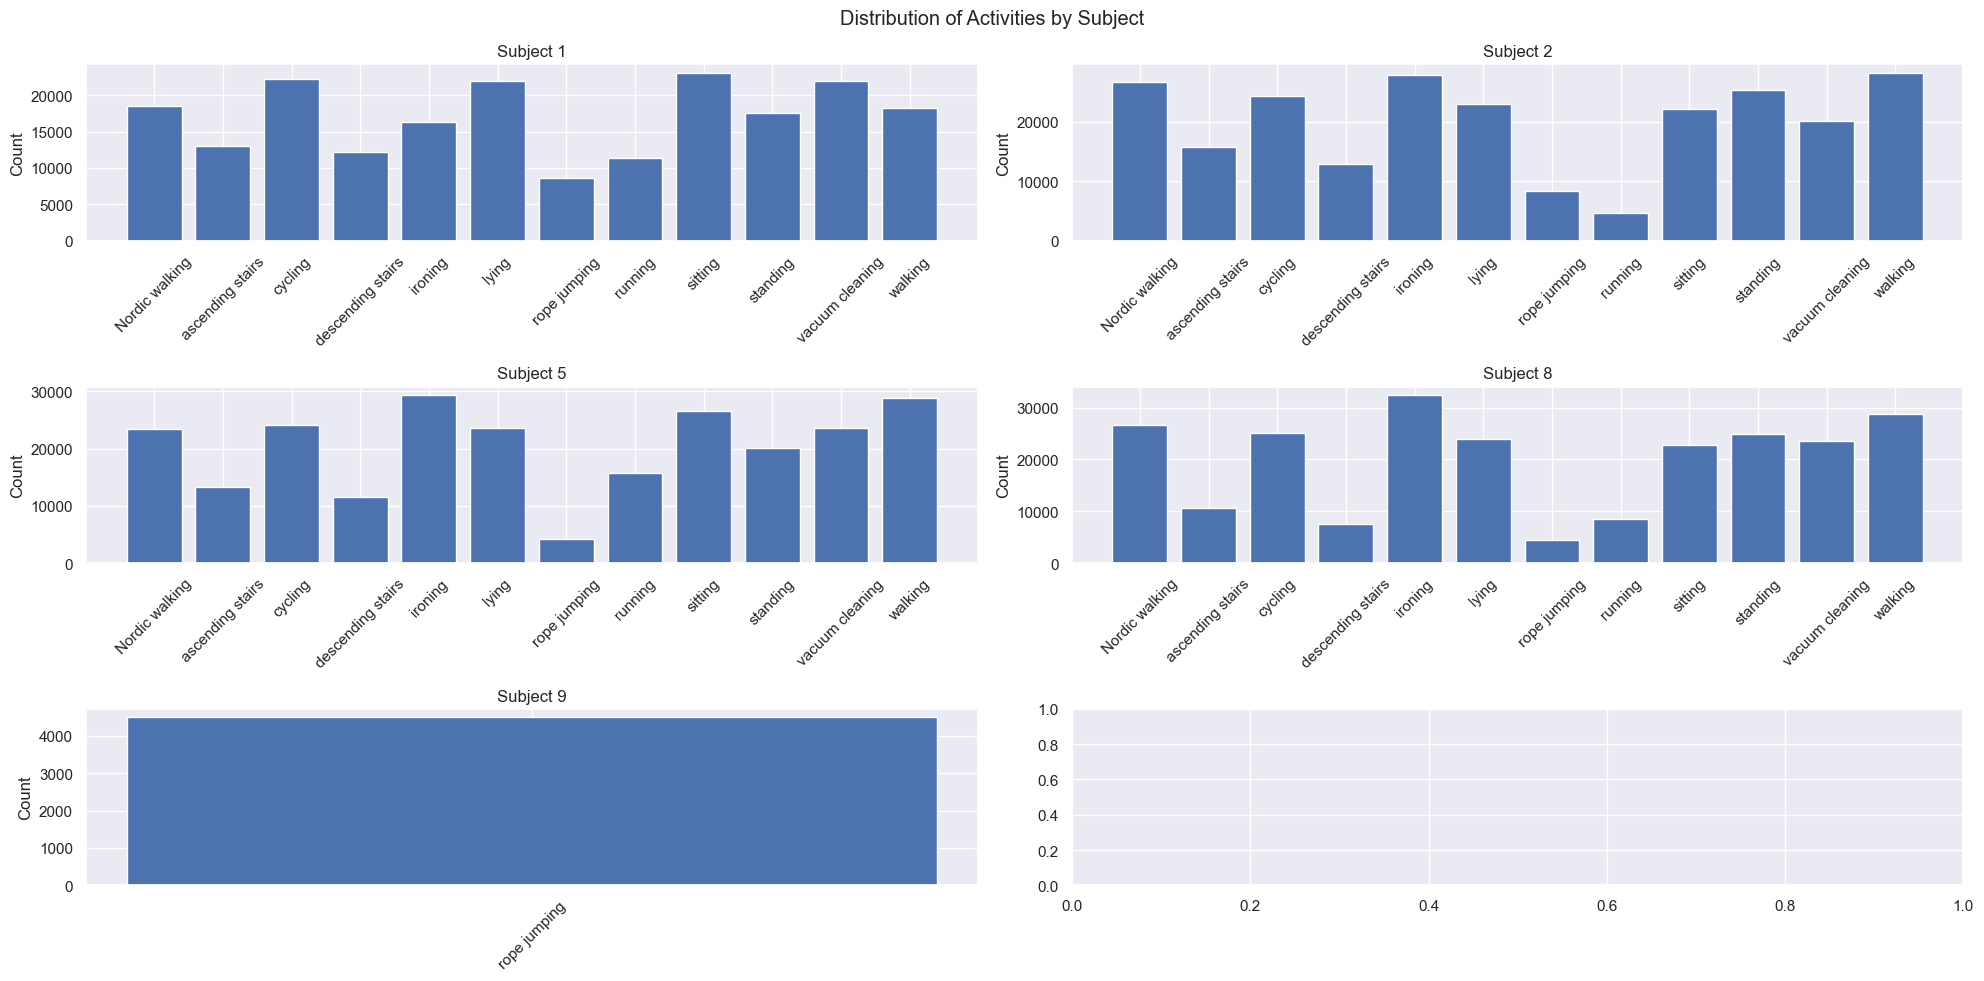

In [20]:
# Number of data points of each subject for each activity.
subject_ids = df['subjectID'].unique()

num_rows = 3
num_cols = 2
num_plots = min(len(subject_ids), num_rows * num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))


for i, subject_id in enumerate(subject_ids[:num_plots]):
    data = df[df['subjectID'] == subject_id]
    counts = data['activity_name'].value_counts().sort_index()
    
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    axes[row_idx, col_idx].bar(counts.index, counts.values)
    axes[row_idx, col_idx].set_ylabel('Count')
    axes[row_idx, col_idx].set_title(f'Subject {subject_id}')
    axes[row_idx, col_idx].tick_params(axis='x', rotation=45)
plt.suptitle('Distribution of Activities by Subject')
fig.tight_layout()
plt.show()

 <font color=black size=2 > &emsp;&emsp;&emsp;**activityID**: Unequal sample size within activities<br/>
 &emsp;&emsp;&emsp; – 'rope_jumping' activity has the least data points(30236).<br/>
 &emsp;&emsp;&emsp; –  Note that we should be care about the **evaluation of the accuracy** and the **selection of algorithms** because of the imbalanced sample size.<br/>
 &emsp;&emsp;&emsp; – Each user performed nearly equal time by each activity.

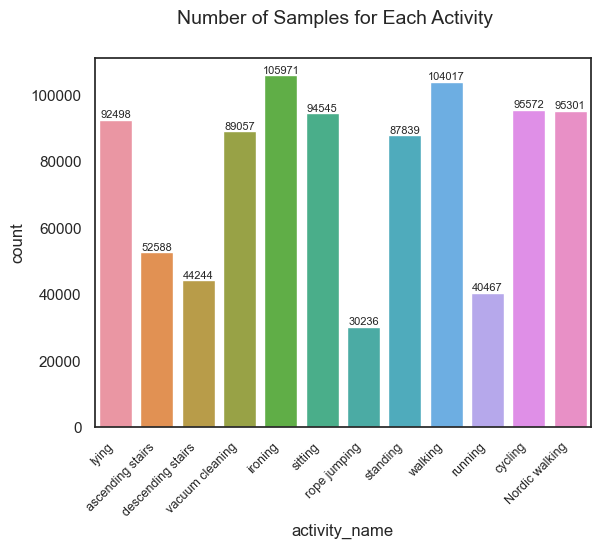

In [9]:

activity_counts=df.groupby(['activityID', 'activity_name']).size().reset_index(name='count')
sns.barplot(data=activity_counts, x='activity_name',y='count')
for index, row in activity_counts.iterrows():
    plt.annotate(row['count'], (index, row['count']), ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.suptitle('Number of Samples for Each Activity',fontsize=14)
plt.show()

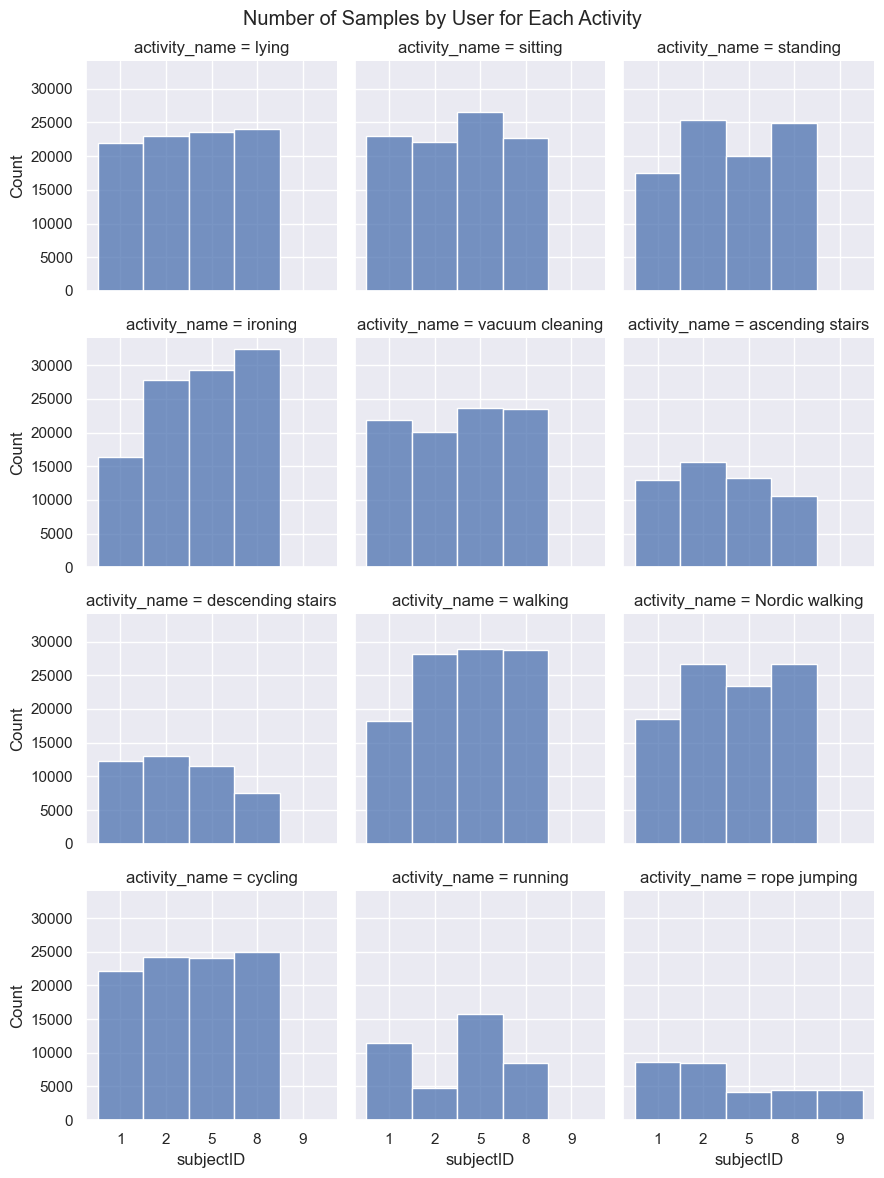

In [22]:
g = sns.FacetGrid(df, col='activity_name',col_wrap=3)
g.map(sns.histplot, 'subjectID')
g.fig.suptitle('Number of Samples by User for Each Activity')
plt.tight_layout()
plt.show()

<font color=black size=4 >**3.2 Visualizing the data**<br/> 

<font color=black size=3 > &emsp; 1) **Heart Rate** <br/>
<font color=black size=2 > &emsp;&emsp;&emsp; – As the intensity of exercise increases (form lying to rope jumping), the heart rate increases;<br/>

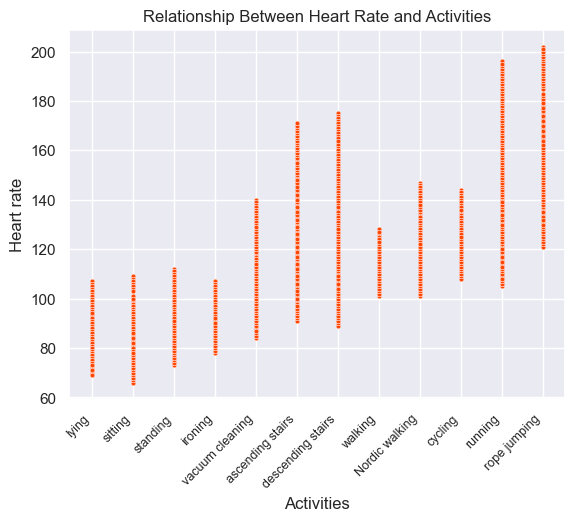

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='activity_name', y='heart rate',color='orangered',s=9)

ax.set_xlabel('Activities')
ax.set_ylabel('Heart rate')
ax.set_title('Relationship Between Heart Rate and Activities')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.show()

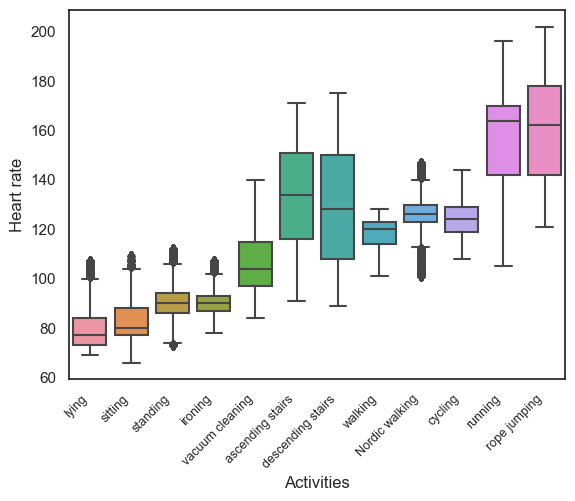

In [84]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='activity_name', y='heart rate')
ax.set_xlabel('Activities')
ax.set_ylabel('Heart rate')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.show()

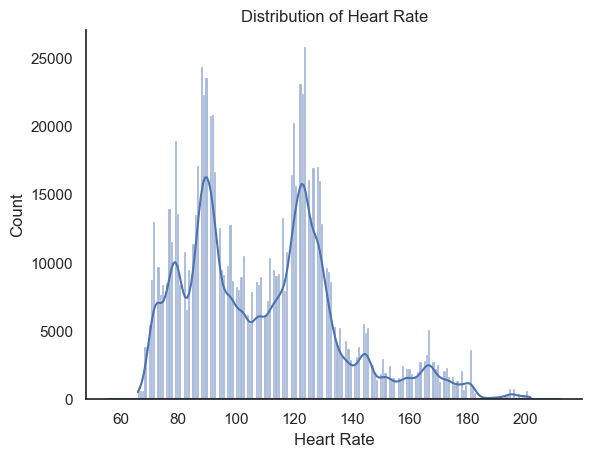

In [58]:
fig, ax = plt.subplots()
sns.histplot(data=df, x='heart rate',  kde=True)
sns.kdeplot(data=df, x='heart rate', linestyle='-', bw_adjust=2)
sns.despine()
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Count')
ax.set_title('Distribution of Heart Rate')
plt.show()

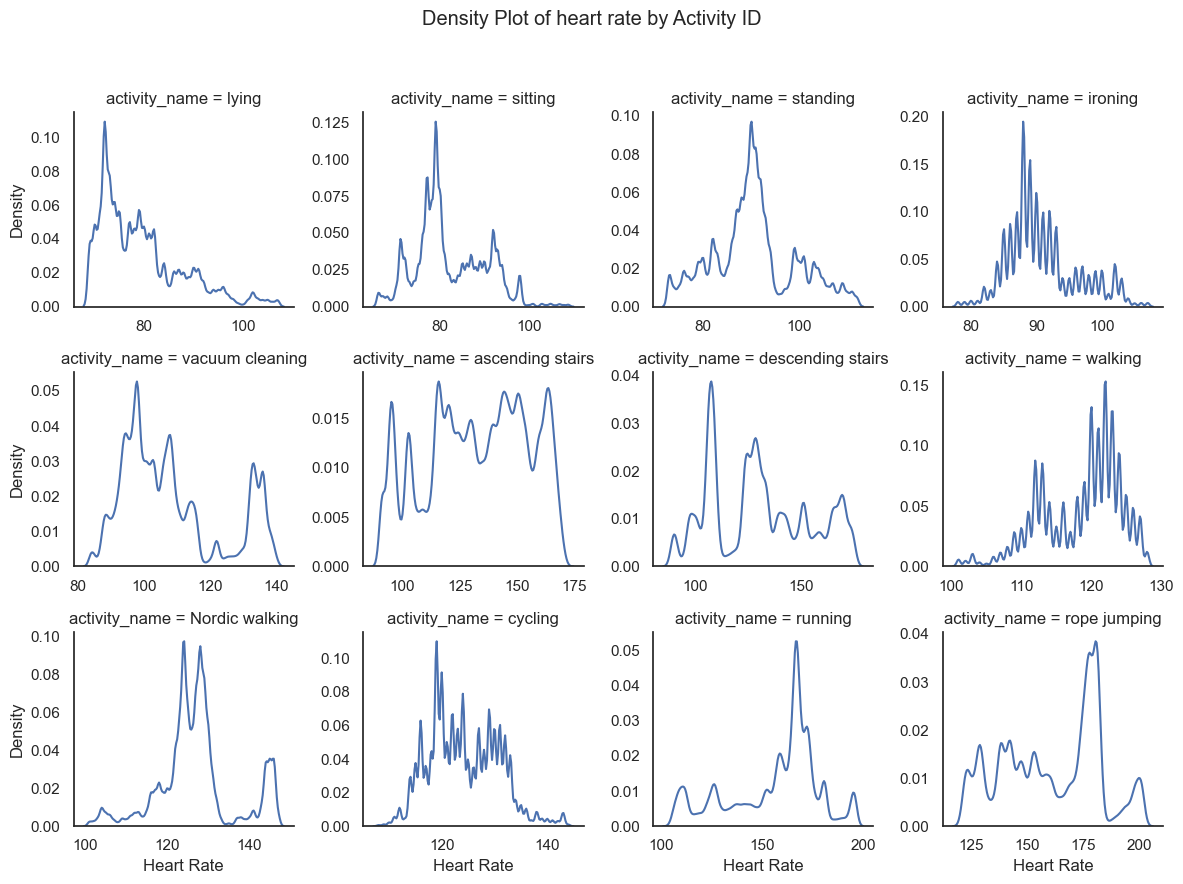

In [54]:
selected_feature = 'heart rate'
selected_data = df[['activity_name', selected_feature]]

g = sns.FacetGrid(selected_data, col='activity_name', col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, selected_feature,  bw_adjust=0.5)

sns.despine()
g.set_xlabels('Heart Rate')
g.set_ylabels('Density')
g.fig.suptitle(f'Density Plot of {selected_feature} by Activity ID')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

<font color=black size=3 > &emsp; 2) **Temperature** <br/>
<font color=black size=2 > &emsp;&emsp;&emsp; – The distribution of temperature is different between hand, chest and ankle, but the shape is similiar;<br/>
&emsp;&emsp;&emsp; – The temperature on the chest is higher than ankle and hand. The temperature between ankle and hand is similar.<br/>
&emsp;&emsp;&emsp; – For different parts of body (hand, chest, ankle), different activities may cause the different level of temperature.<br/>
&emsp;&emsp;&emsp; – For the same activity, different parts of the body have different ranges of temperature fluctuations; e.g., lying: the range of hand's temperature is smaller than ankle and chest;<br/>
&emsp;&emsp;&emsp; – When people did vacuum cleaning, the range of temperature on hand and ankle is minimum with high average value. When people did descending stairs, the range of temperature of chest is minimum with high average value.

In [24]:
activity = df['activity_name']
h_temp = df['h_temp']
c_temp = df['c_temp']
a_temp = df['a_temp']

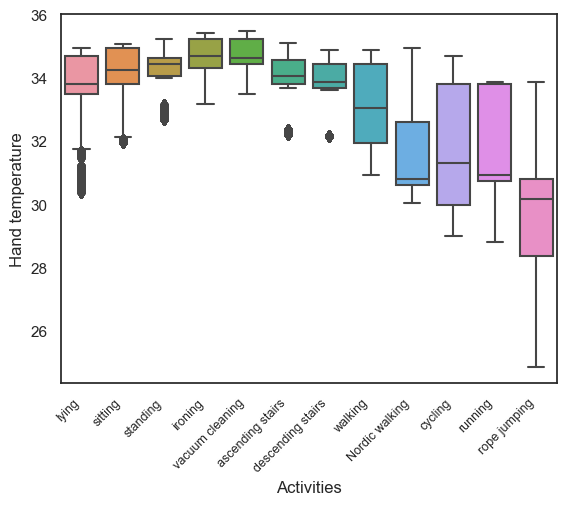

In [5]:
sns.set_style("white")
fig, ax = plt.subplots()

sns.boxplot(data=df, x='activity_name', y='h_temp')
ax.set_xlabel('Activities')
ax.set_ylabel('Hand temperature')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.show()

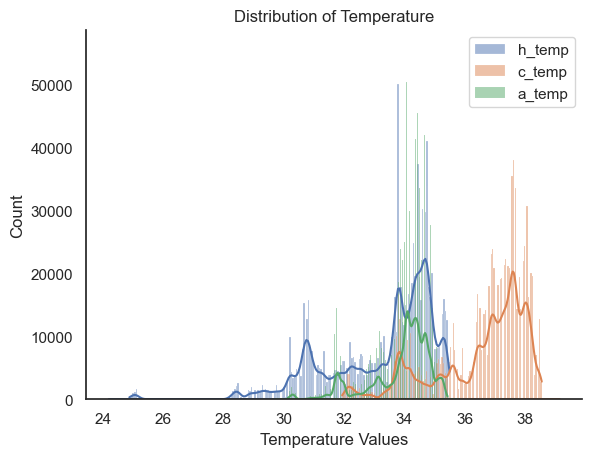

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['h_temp', 'c_temp', 'a_temp']
selected_data = df[selected_features]

sns.set_style("white")
fig, ax = plt.subplots()
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax, linestyle='-', bw_adjust=2)
sns.despine()
ax.set_xlabel('Temperature Values')
ax.set_ylabel('Count')
ax.set_title('Distribution of Temperature')
ax.legend()
plt.show()

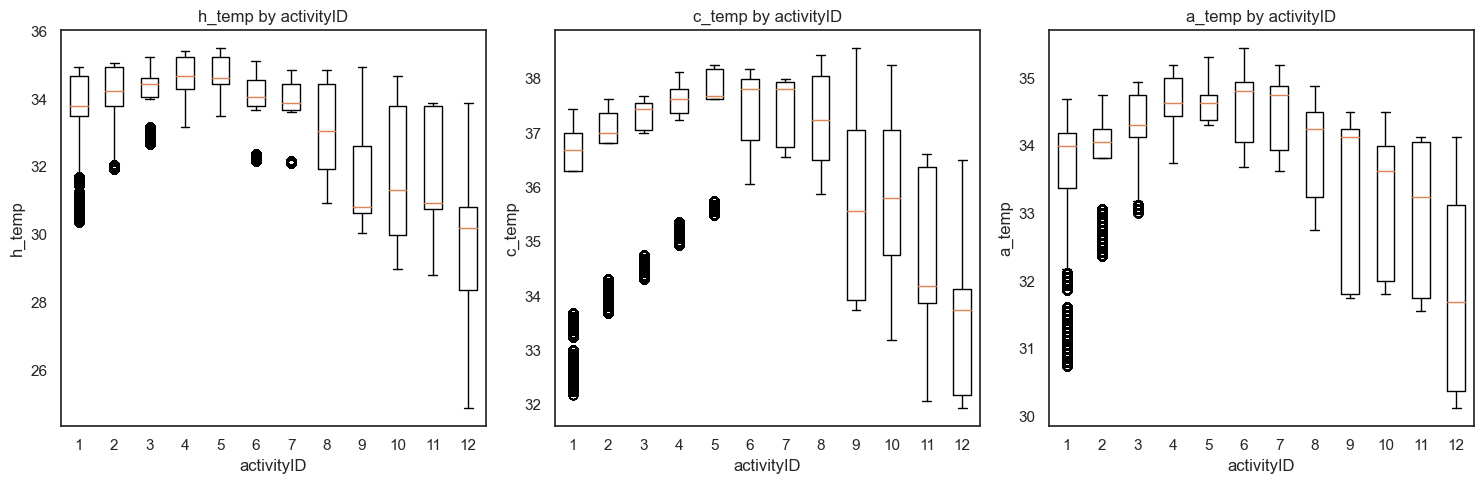

In [82]:
selected_vars = ['h_temp', 'c_temp', 'a_temp']
category_var = 'activityID'
num_rows = 1
num_cols = 3
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i, var in enumerate(selected_vars):
    ax = axs[i] 
    ax.boxplot([df[var][df[category_var] == category] for category in df[category_var].unique()])
    ax.set_title(f'{var} by {category_var}')
    ax.set_xlabel(category_var)
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()


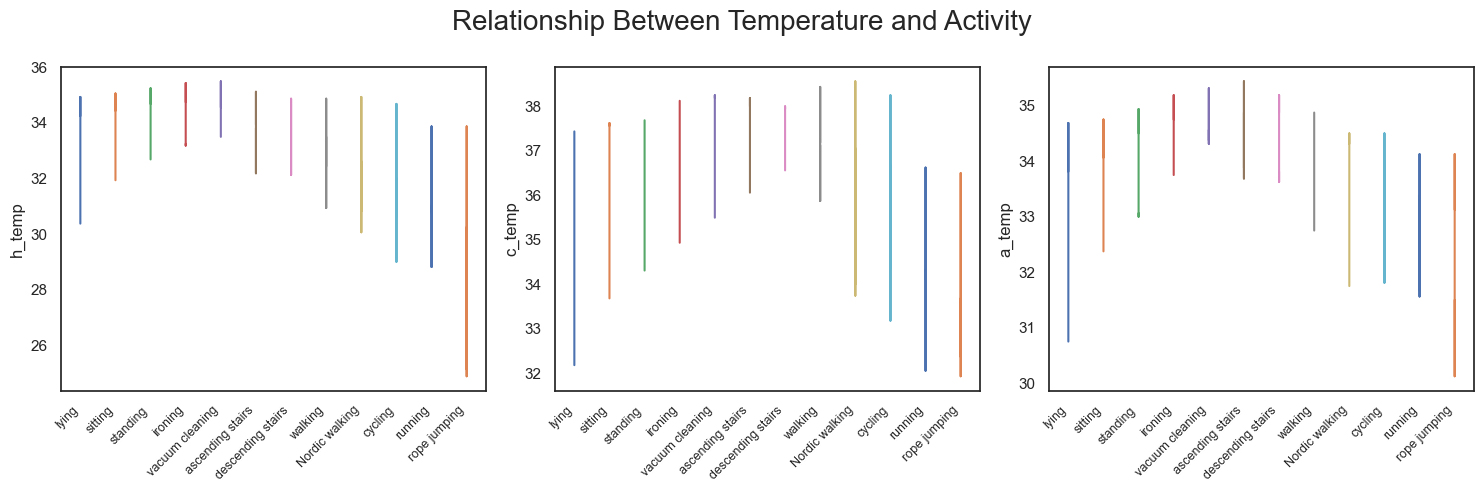

In [50]:
selected_vars = ['h_temp', 'c_temp', 'a_temp']
category_var = 'activity_name'

num_rows = 1
num_cols = 3

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5))

for i, var in enumerate(selected_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axs[col]
    
    for category in df[category_var].unique():
        ax.plot(df[category_var][df[category_var] == category], 
                df[var][df[category_var] == category], label=category)

    ax.set_ylabel(var)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

plt.suptitle('Relationship Between Temperature and Activity', fontsize=20)
plt.tight_layout()
plt.show()


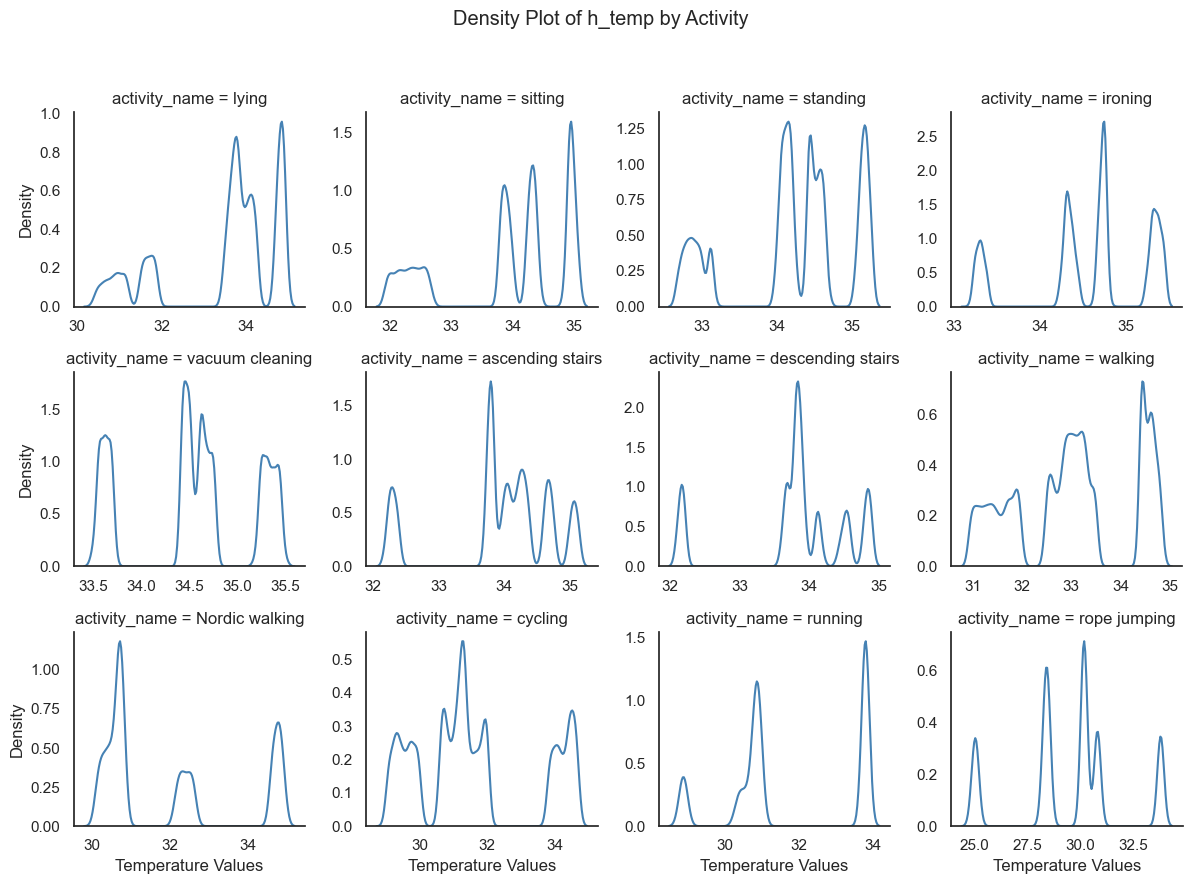

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
selected_feature = 'h_temp'
selected_data = df[['activity_name', selected_feature]]

g = sns.FacetGrid(selected_data, col='activity_name', col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, selected_feature, color='steelblue', bw_adjust=0.5)

sns.despine()
g.set_xlabels('Temperature Values')
g.set_ylabels('Density')
g.fig.suptitle(f'Density Plot of {selected_feature} by Activity')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


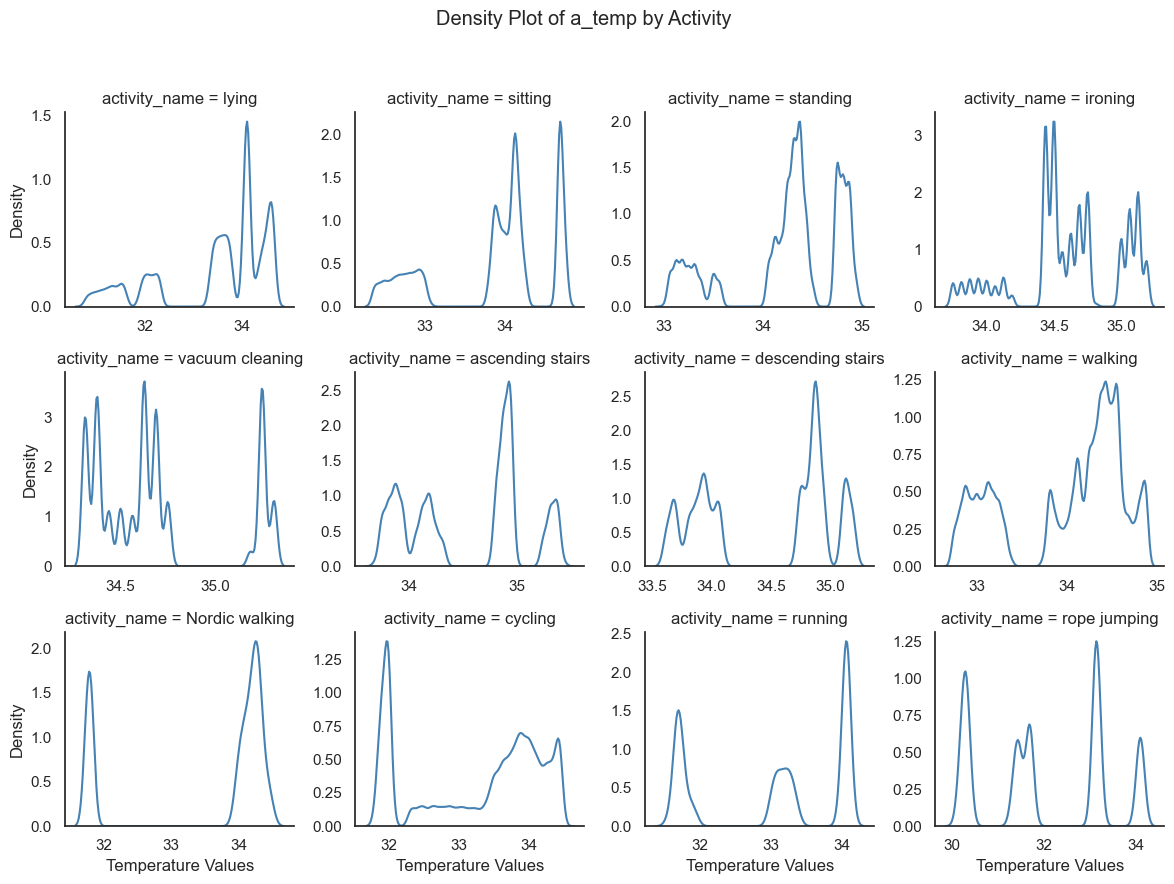

In [65]:

sns.set_style("white")
selected_feature = 'a_temp'
selected_data = df[['activity_name', selected_feature]]

g = sns.FacetGrid(selected_data, col='activity_name', col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, selected_feature, color='steelblue', bw_adjust=0.5)

sns.despine()
g.set_xlabels('Temperature Values')
g.set_ylabels('Density')
g.fig.suptitle(f'Density Plot of {selected_feature} by Activity')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

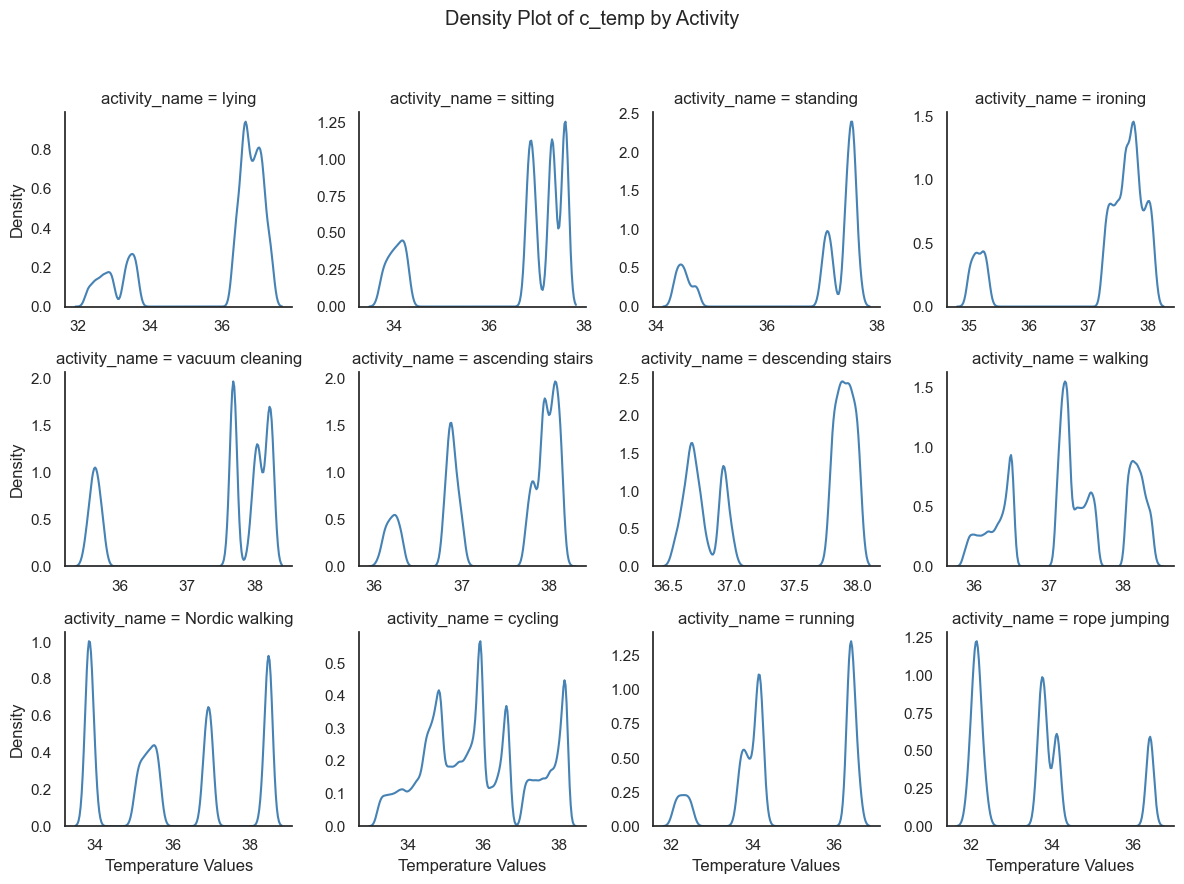

In [66]:

sns.set_style("white")
selected_feature = 'c_temp'
selected_data = df[['activity_name', selected_feature]]

g = sns.FacetGrid(selected_data, col='activity_name', col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, selected_feature, color='steelblue', bw_adjust=0.5)

sns.despine()
g.set_xlabels('Temperature Values')
g.set_ylabels('Density')
g.fig.suptitle(f'Density Plot of {selected_feature} by Activity')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

<font color=black size=3 > &emsp; 3) **Acceleration** <br/>
<font color=black size=2 > &emsp;&emsp;&emsp; –hand<br/>
    &emsp;&emsp;&emsp; –chest<br/>
    &emsp;&emsp;&emsp; –ankle<br/>

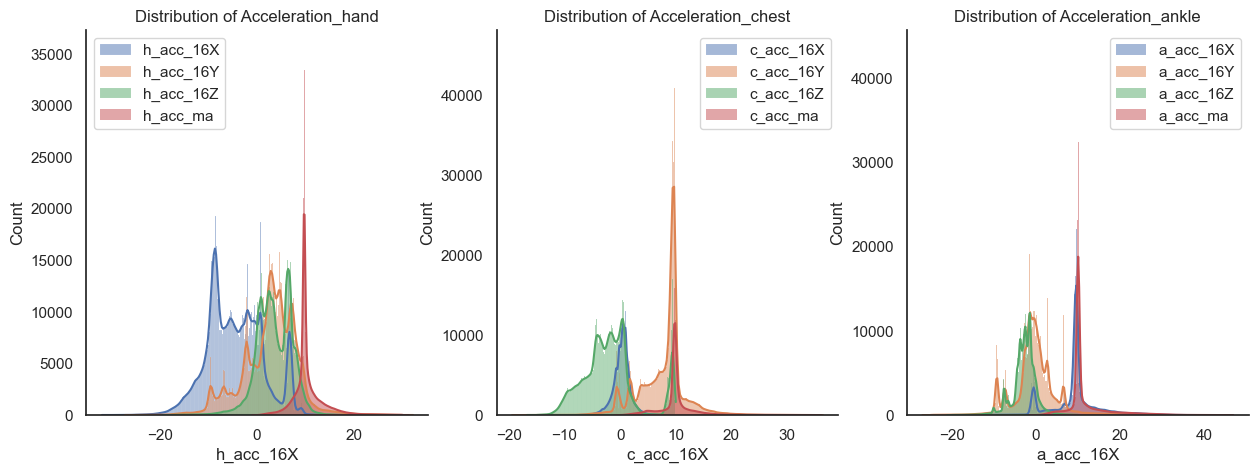

In [69]:
fig = plt.figure(figsize=(15, 5))

selected_features = ['h_acc_16X', 'h_acc_16Y', 'h_acc_16Z', 'h_acc_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax1 = plt.subplot(1, 3, 1)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax1, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax1, linestyle='-', bw_adjust=2)
sns.despine()
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Acceleration_hand')
ax1.legend()

selected_features = ['c_acc_16X', 'c_acc_16Y', 'c_acc_16Z', 'c_acc_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax2 = plt.subplot(1, 3, 2)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax2, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax2, linestyle='-', bw_adjust=2)
sns.despine()
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Acceleration_chest')
ax2.legend()

selected_features = ['a_acc_16X', 'a_acc_16Y', 'a_acc_16Z', 'a_acc_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax3 = plt.subplot(1, 3, 3)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax3, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax3, linestyle='-', bw_adjust=2)
sns.despine()
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Acceleration_ankle')
ax3.legend()

plt.show()


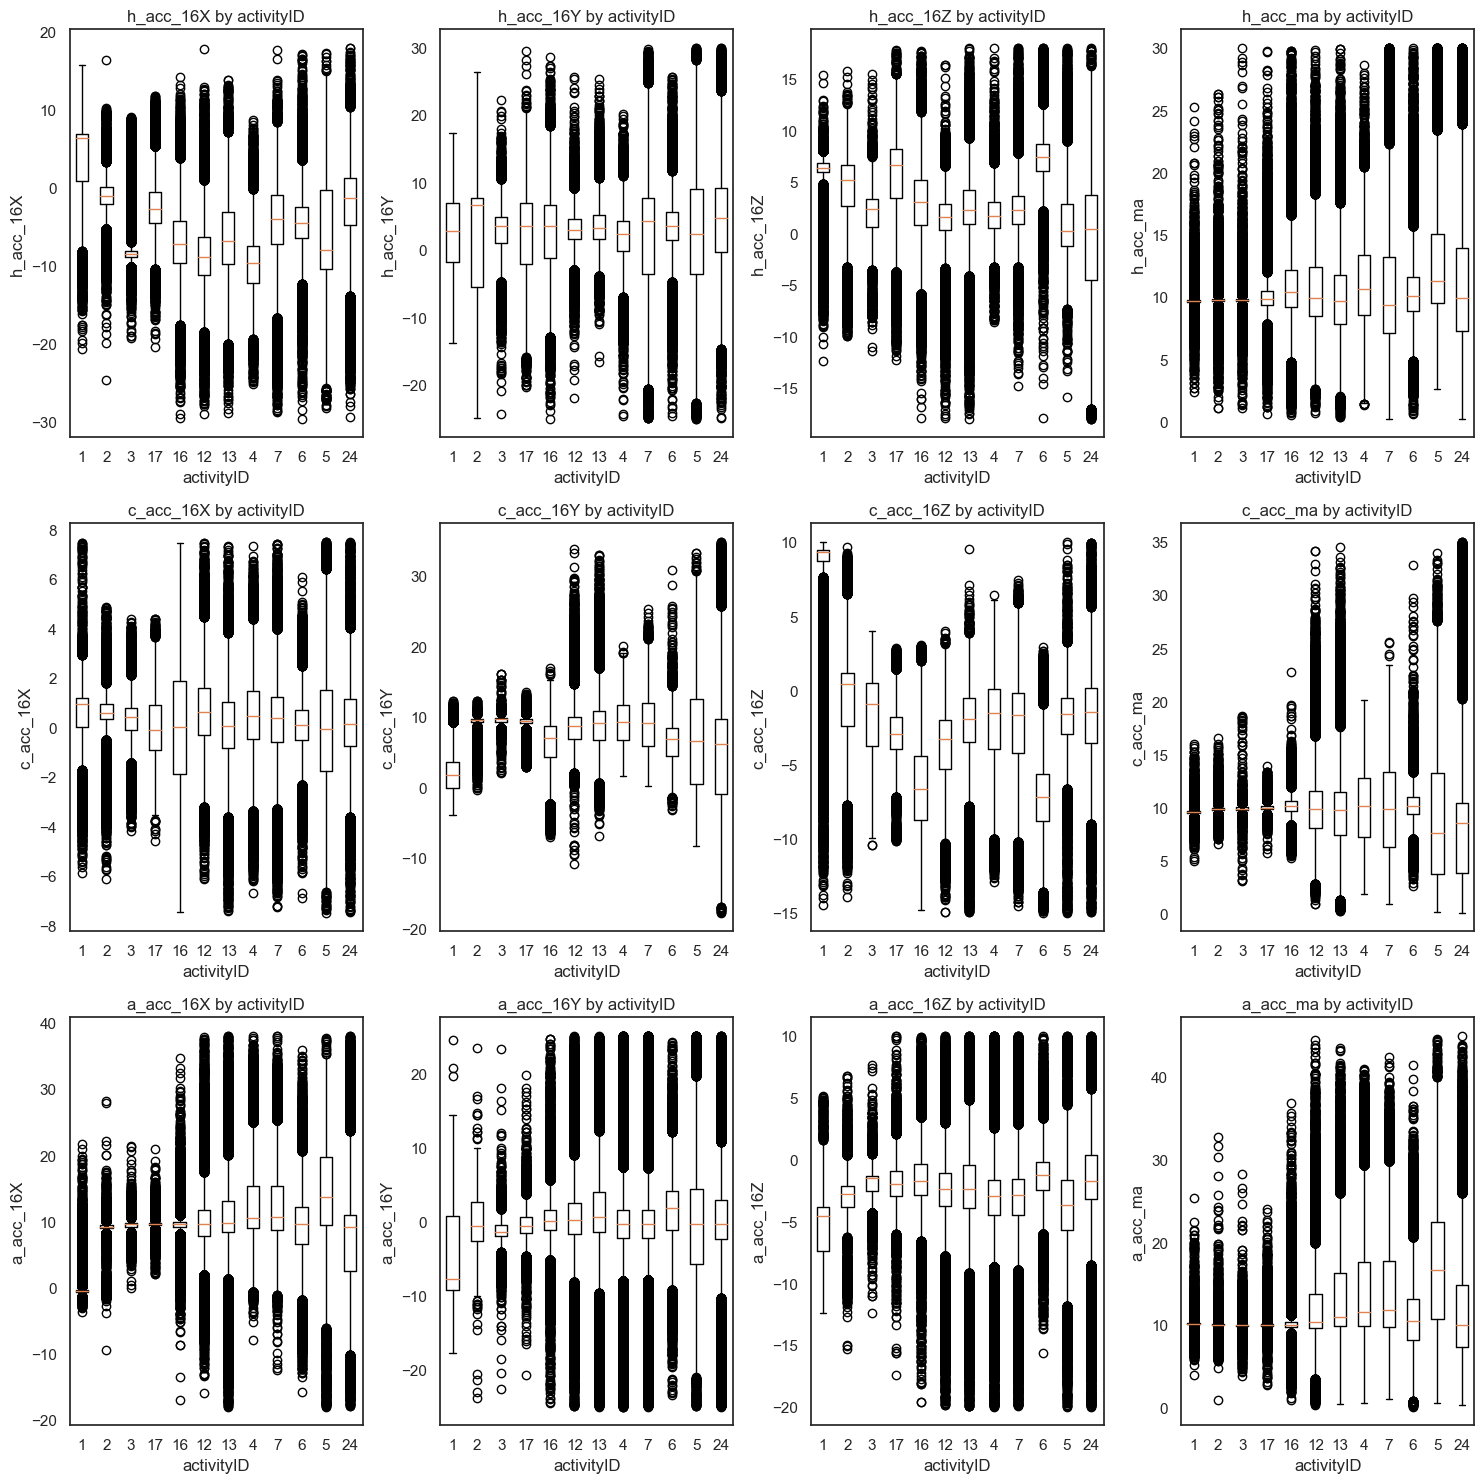

In [72]:
selected_vars = ['h_acc_16X', 'h_acc_16Y', 'h_acc_16Z', 'h_acc_ma', 
                 'c_acc_16X', 'c_acc_16Y', 'c_acc_16Z', 'c_acc_ma',
                 'a_acc_16X', 'a_acc_16Y', 'a_acc_16Z', 'a_acc_ma']

category_var = 'activityID'
num_rows = 3
num_cols = 4
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i, var in enumerate(selected_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    ax.boxplot([df[var][df[category_var] == category] for category in df[category_var].unique()],
               labels=df[category_var].unique())
    ax.set_title(f'{var} by {category_var}')
    ax.set_xlabel(category_var)
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()


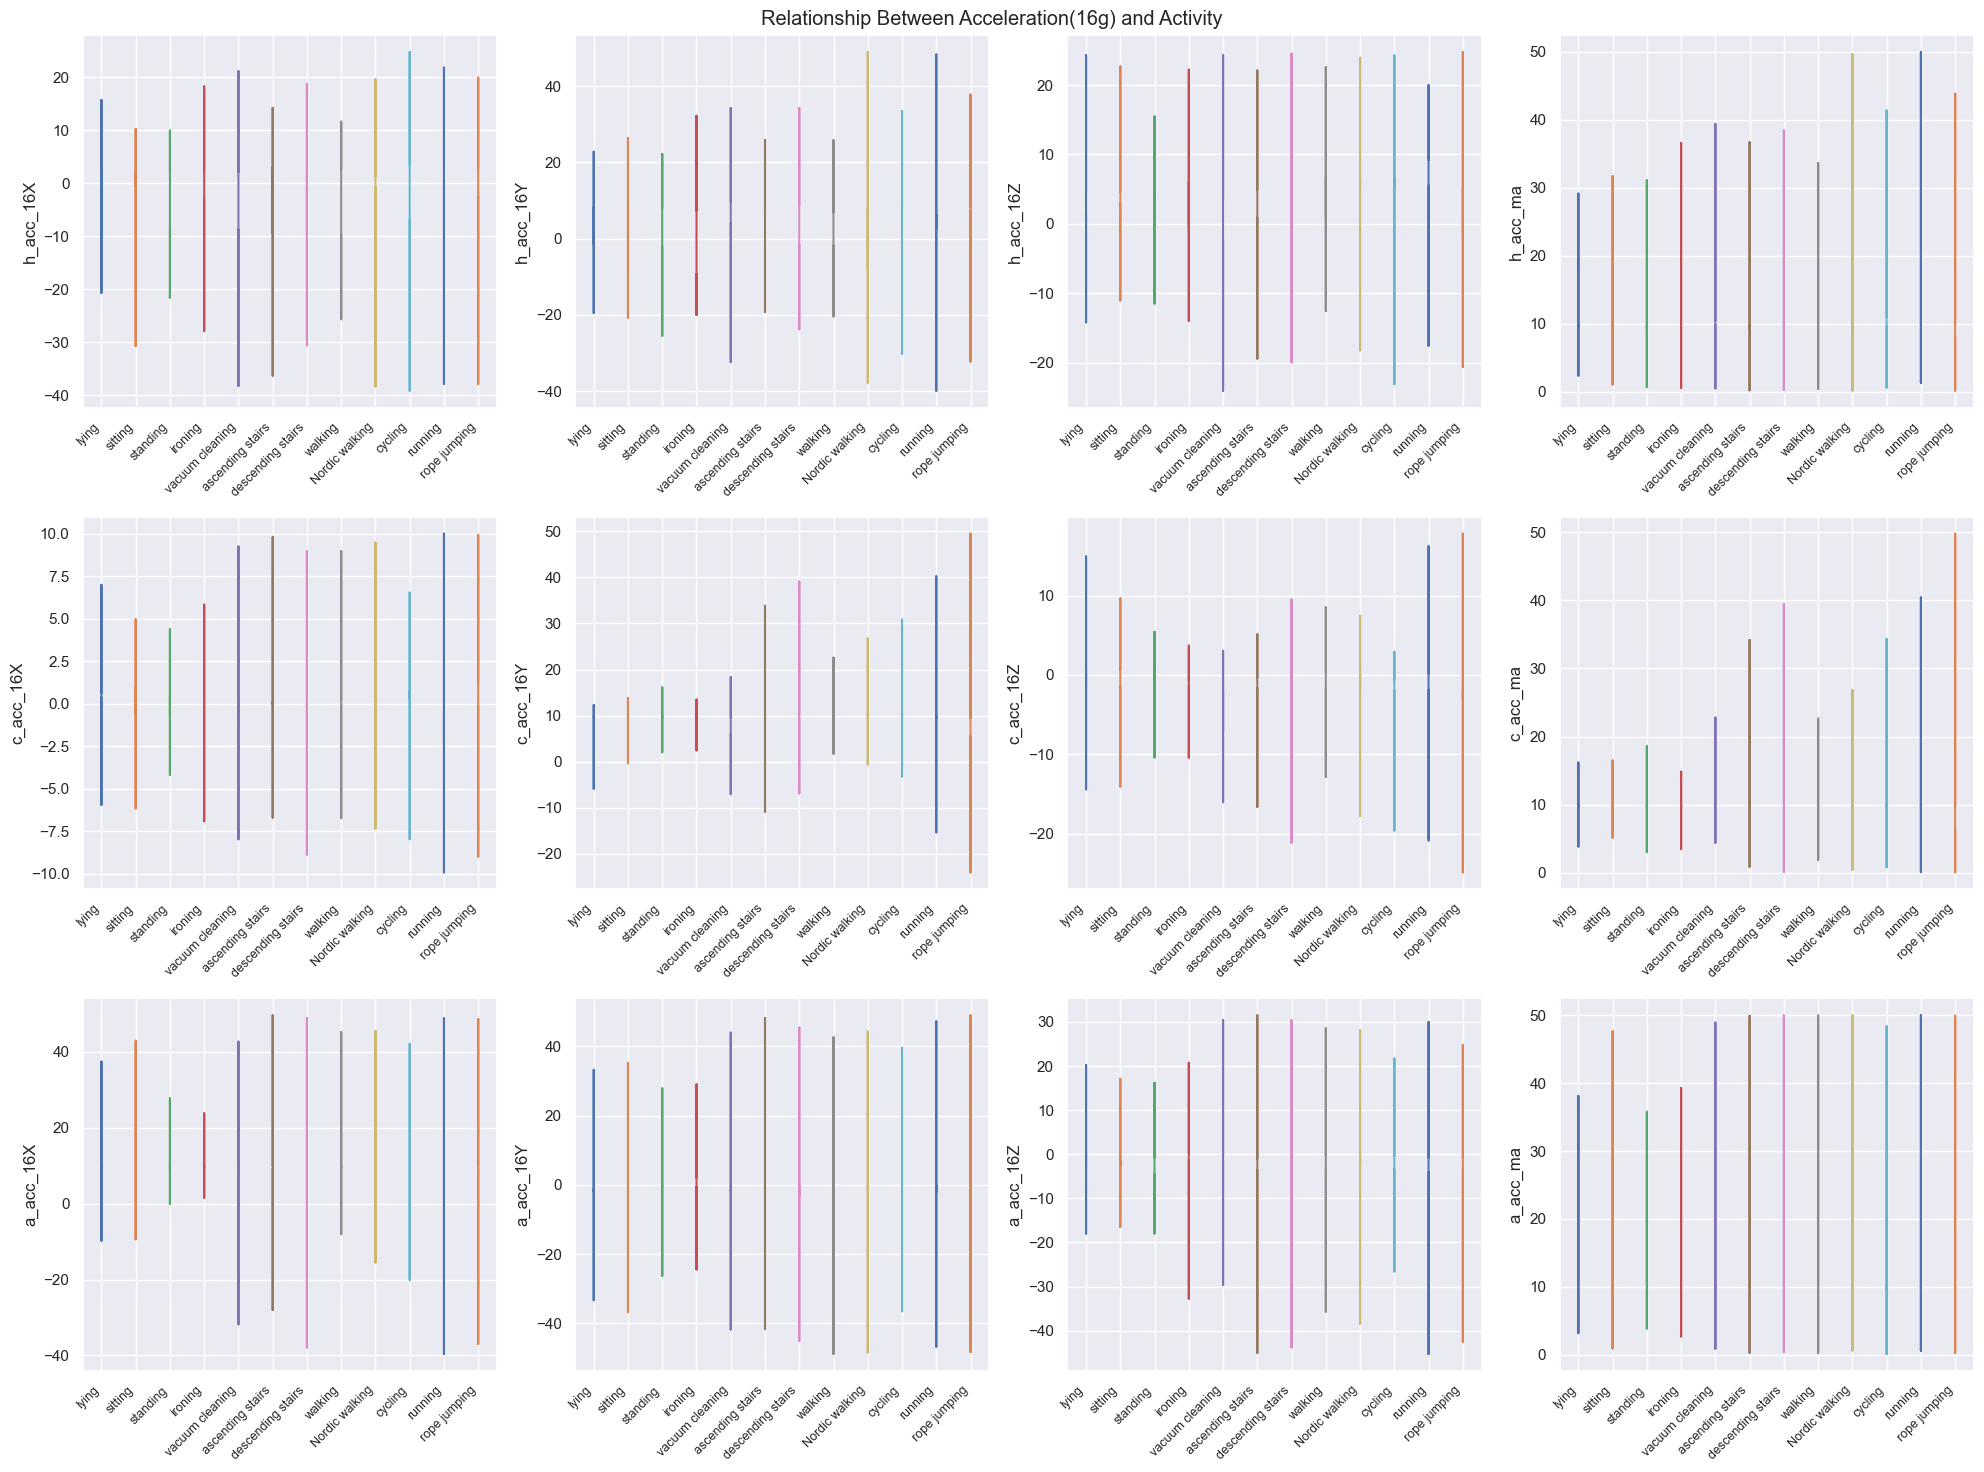

In [41]:
selected_vars = ['h_acc_16X', 'h_acc_16Y', 'h_acc_16Z', 'h_acc_ma',
                'c_acc_16X', 'c_acc_16Y', 'c_acc_16Z', 'c_acc_ma',
                'a_acc_16X', 'a_acc_16Y', 'a_acc_16Z','a_acc_ma']
category_var = 'activity_name'

num_rows = 3
num_cols = 4

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

for i, var in enumerate(selected_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    
    for category in df[category_var].unique():
        ax.plot(df[category_var][df[category_var] == category], 
                df[var][df[category_var] == category], label=category)

    # ax.set_title(f'{var} by {category_var}')
    # ax.set_xlabel(category_var)
    ax.set_ylabel(var)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

plt.suptitle('Relationship Between Acceleration(16g) and Activity')
plt.tight_layout()
plt.show()


<font color=black size=3 > &emsp; 4) **Gyroscope** <br/>
<font color=black size=2 > &emsp;&emsp;&emsp; –hand<br/>
    &emsp;&emsp;&emsp; –chest<br/>
    &emsp;&emsp;&emsp; –ankle<br/>

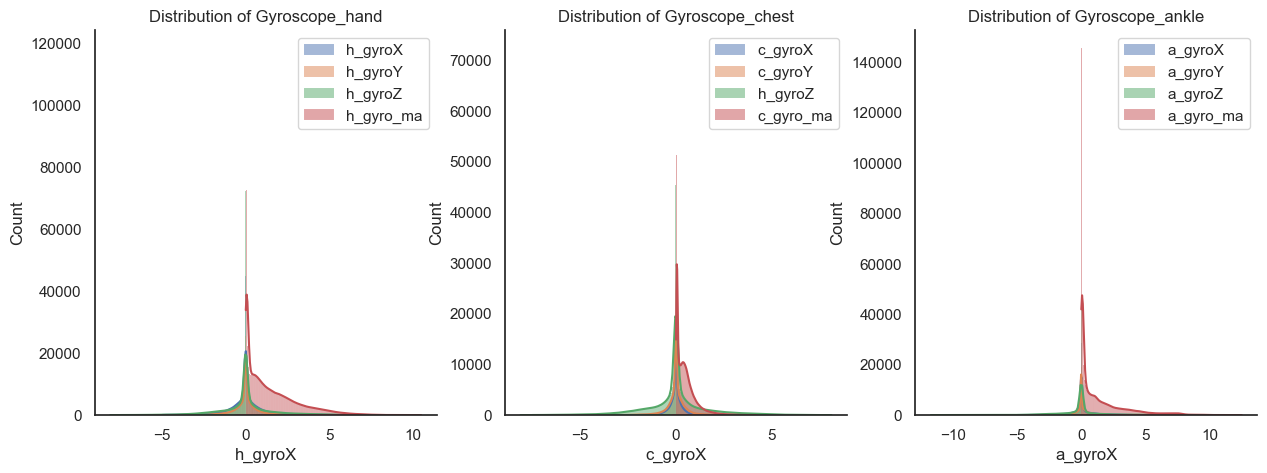

In [75]:
fig = plt.figure(figsize=(15, 5))

selected_features = ['h_gyroX', 'h_gyroY', 'h_gyroZ', 'h_gyro_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax1 = plt.subplot(1, 3, 1)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax1, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax1, linestyle='-', bw_adjust=2)
sns.despine()
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Gyroscope_hand')
ax1.legend()

selected_features = ['c_gyroX', 'c_gyroY', 'h_gyroZ', 'c_gyro_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax2 = plt.subplot(1, 3, 2)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax2, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax2, linestyle='-', bw_adjust=2)
sns.despine()
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Gyroscope_chest')
ax2.legend()

selected_features = ['a_gyroX', 'a_gyroY', 'a_gyroZ', 'a_gyro_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax3 = plt.subplot(1, 3, 3)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax3, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax3, linestyle='-', bw_adjust=2)
sns.despine()
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Gyroscope_ankle')
ax3.legend()

plt.show()


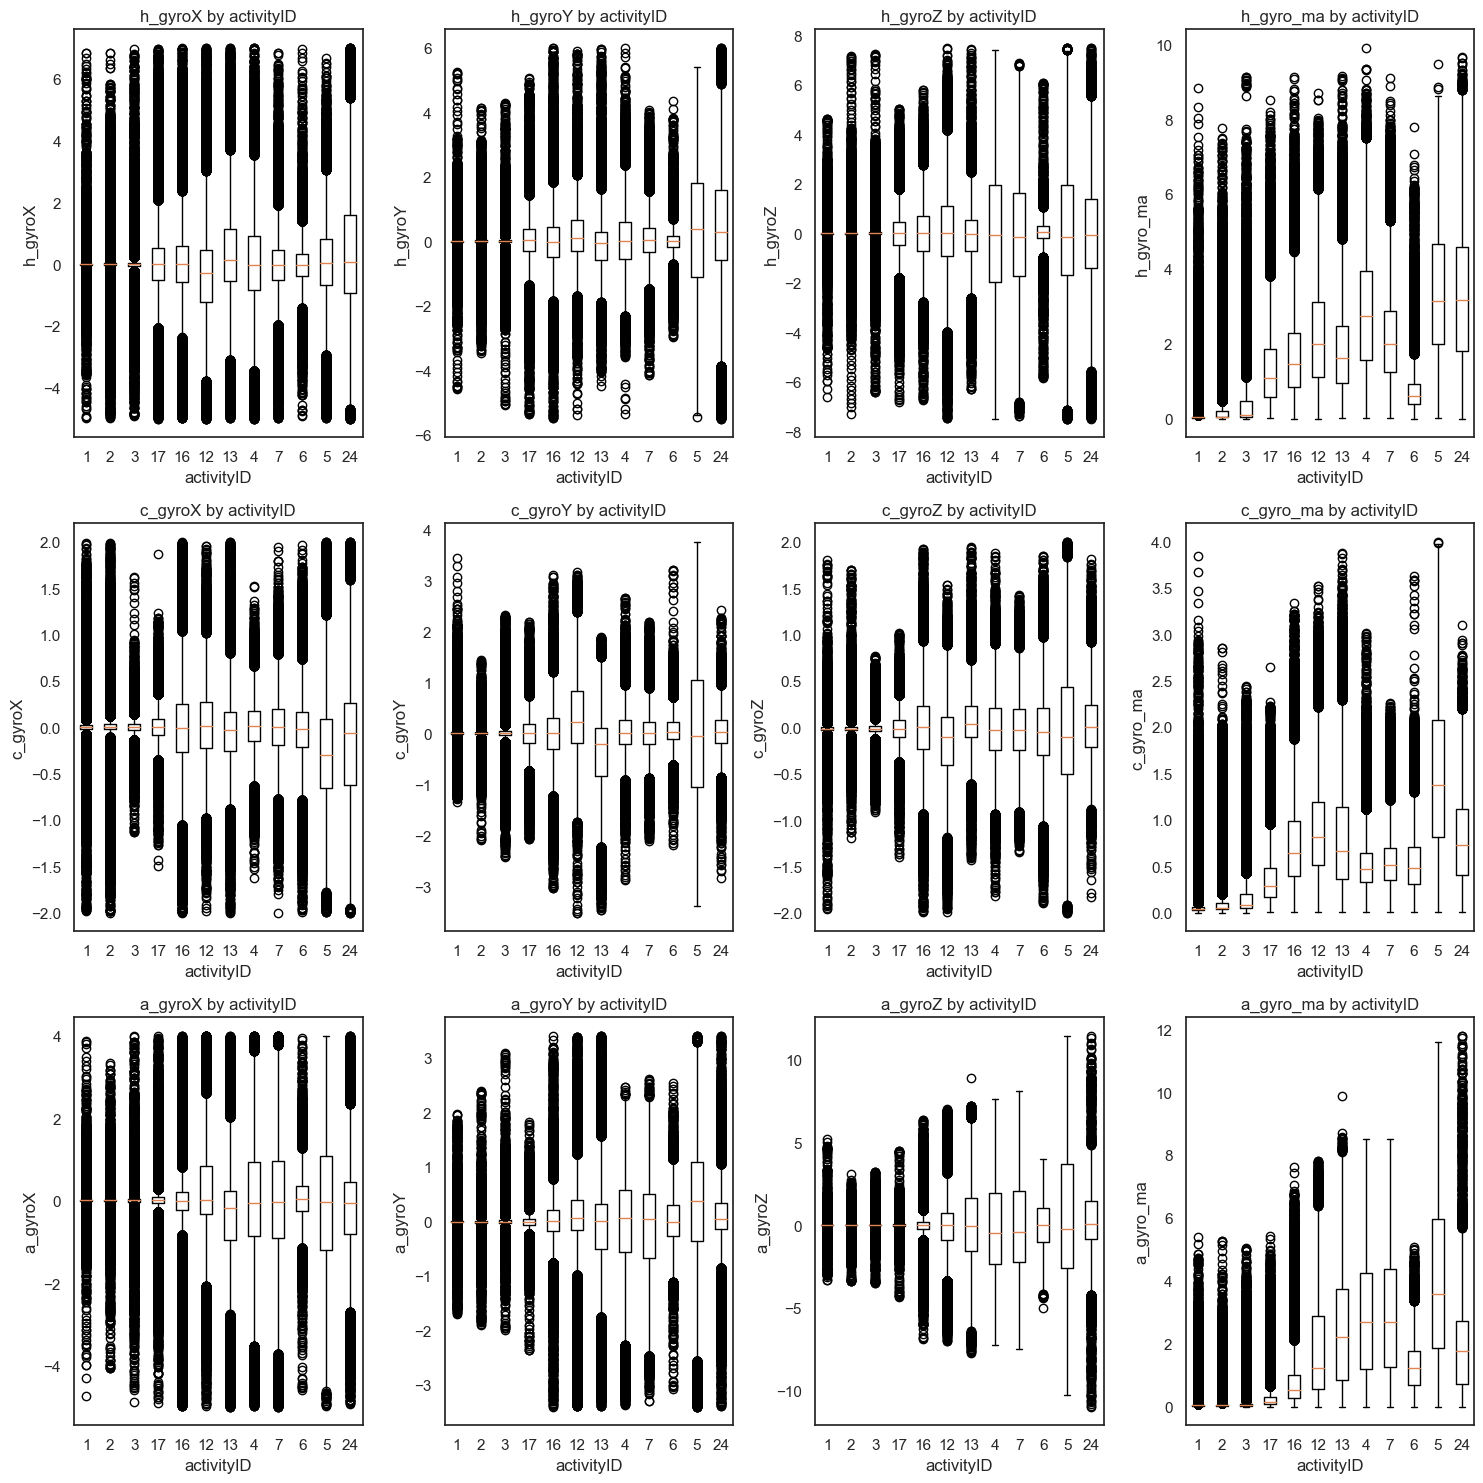

In [85]:
selected_vars = ['h_gyroX','h_gyroY', 'h_gyroZ', 'h_gyro_ma',
                 'c_gyroX', 'c_gyroY', 'c_gyroZ', 'c_gyro_ma',
                'a_gyroX', 'a_gyroY', 'a_gyroZ','a_gyro_ma']

category_var = 'activityID'
num_rows = 3
num_cols = 4
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i, var in enumerate(selected_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    ax.boxplot([df[var][df[category_var] == category] for category in df[category_var].unique()],
               labels=df[category_var].unique())
    ax.set_title(f'{var} by {category_var}')
    ax.set_xlabel(category_var)
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

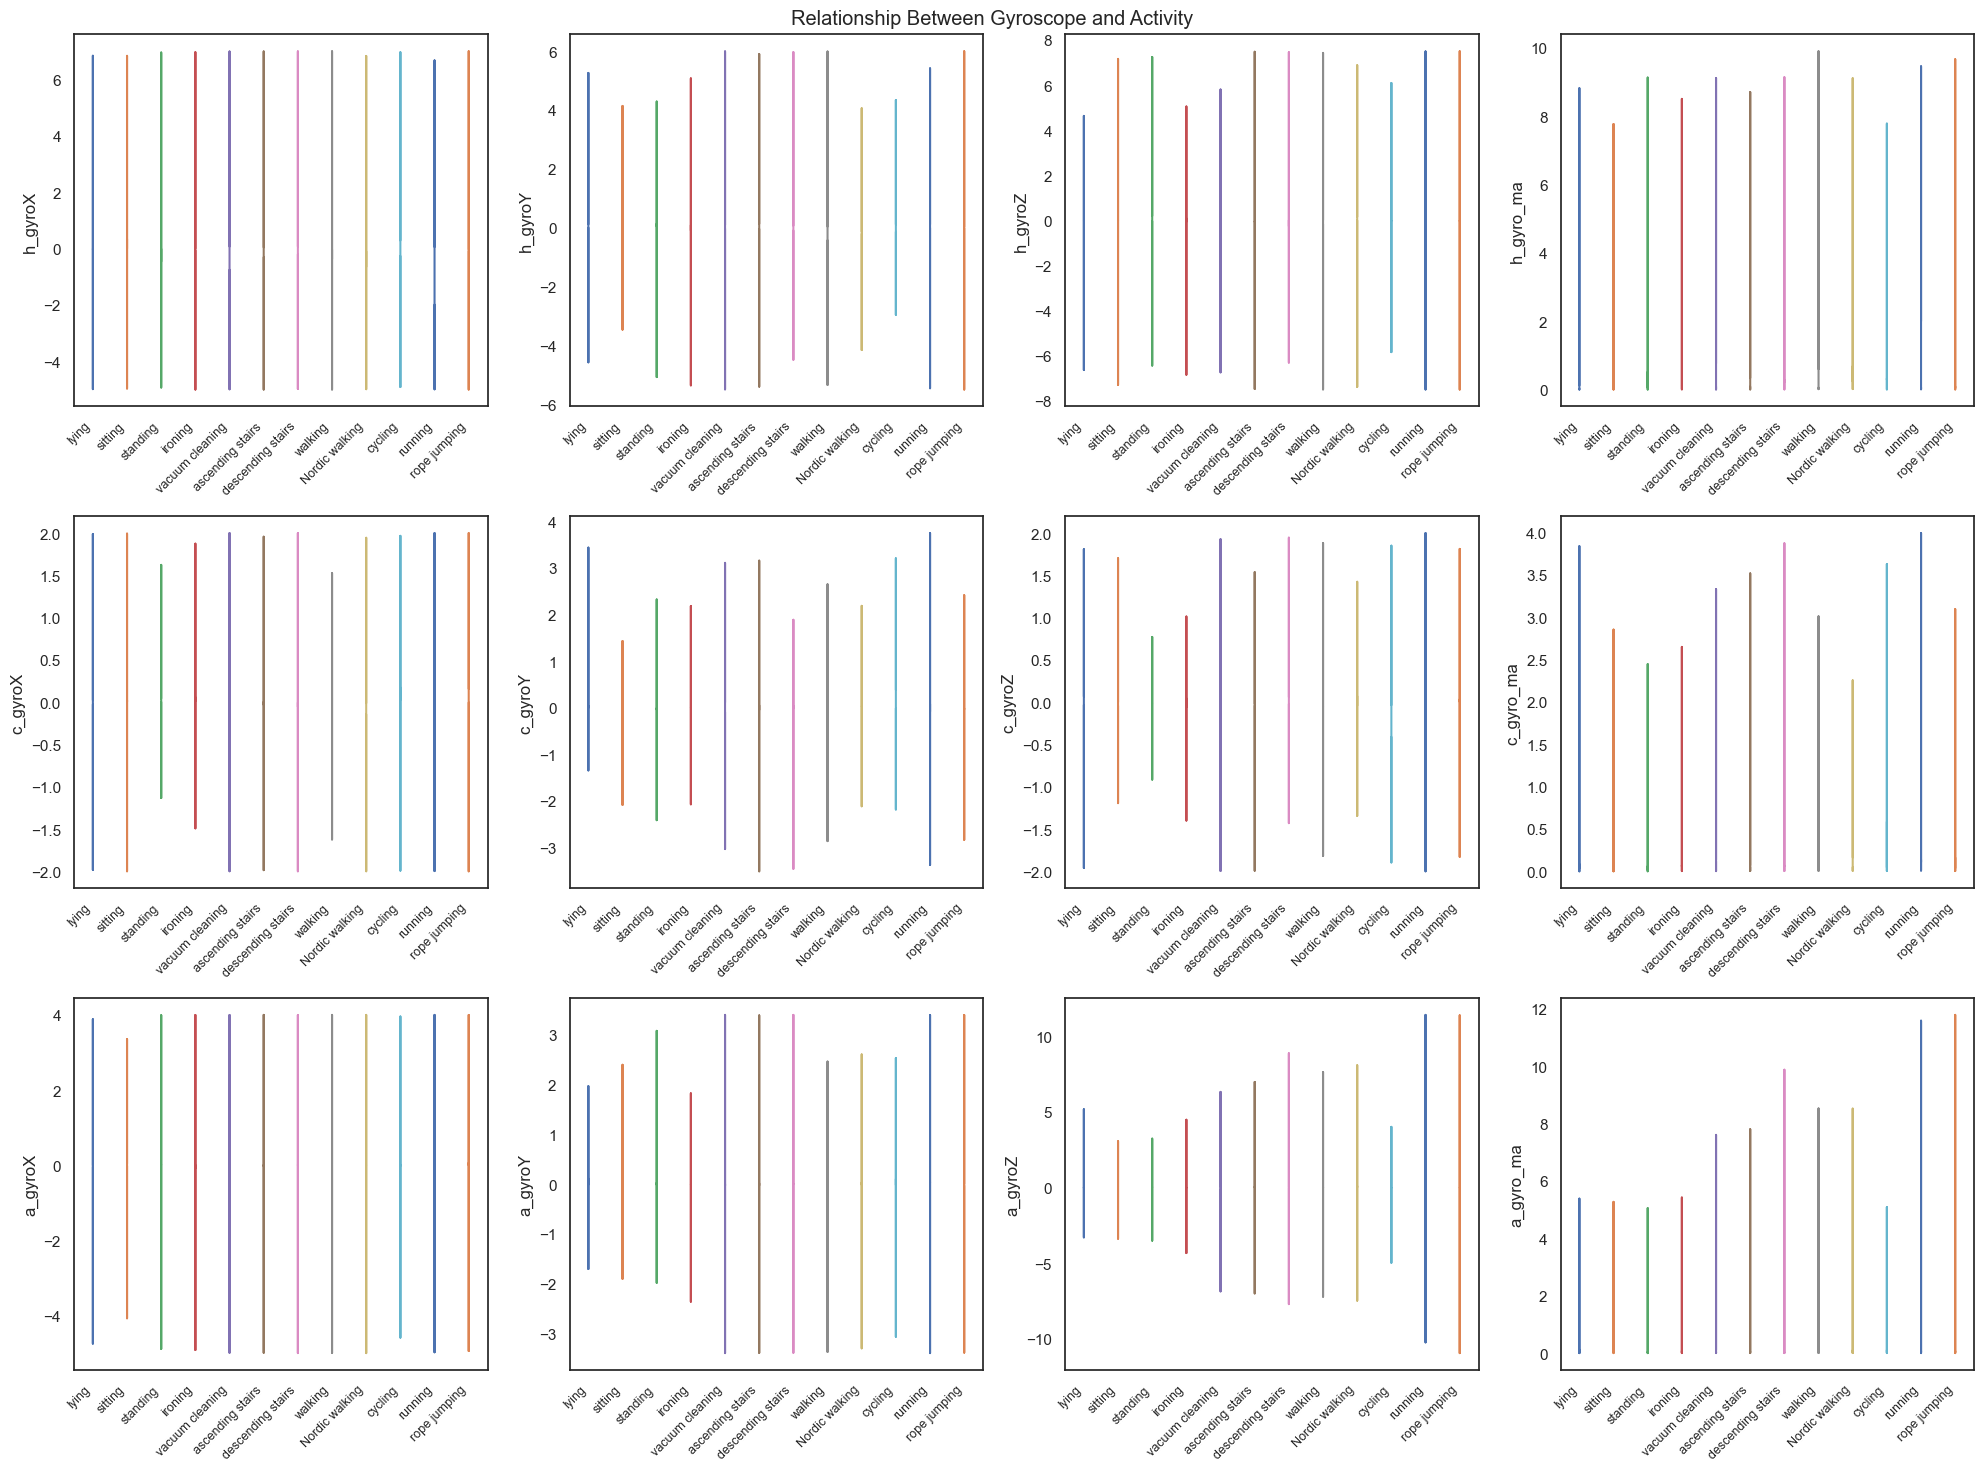

In [76]:
selected_vars = ['h_gyroX','h_gyroY', 'h_gyroZ', 'h_gyro_ma',
                 'c_gyroX', 'c_gyroY', 'c_gyroZ', 'c_gyro_ma',
                'a_gyroX', 'a_gyroY', 'a_gyroZ','a_gyro_ma']
category_var = 'activity_name'

num_rows = 3
num_cols = 4

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

for i, var in enumerate(selected_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    
    for category in df[category_var].unique():
        ax.plot(df[category_var][df[category_var] == category], 
                df[var][df[category_var] == category], label=category)

    ax.set_ylabel(var)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

plt.suptitle('Relationship Between Gyroscope and Activity')
plt.tight_layout()
plt.show()

<font color=black size=3 > &emsp; 5) **Magnetometer** <br/>
<font color=black size=2 > &emsp;&emsp;&emsp; –hand<br/>
    &emsp;&emsp;&emsp; –chest<br/>
    &emsp;&emsp;&emsp; –ankle<br/>

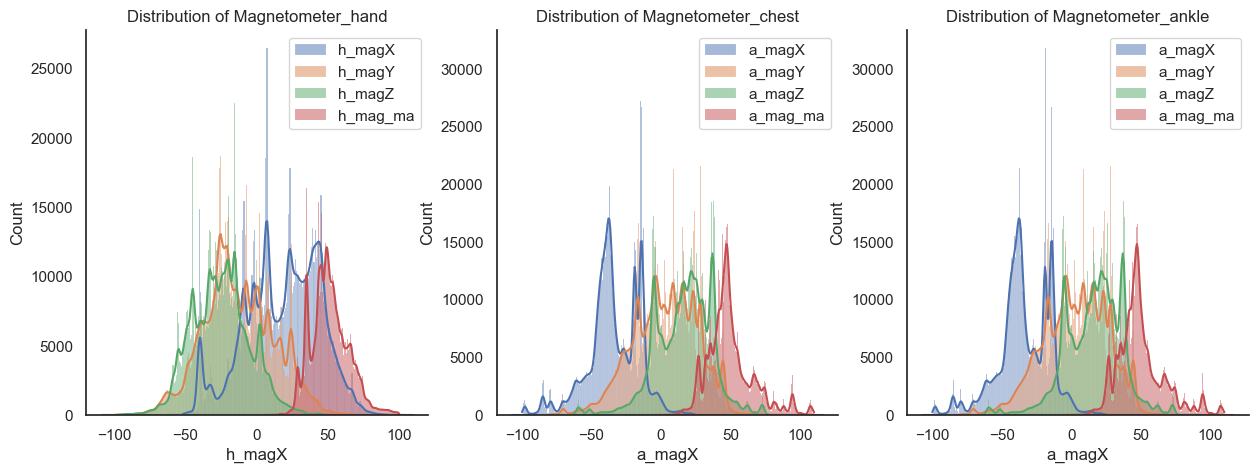

In [74]:
fig = plt.figure(figsize=(15, 5))

selected_features = ['h_magX', 'h_magY', 'h_magZ', 'h_mag_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax1 = plt.subplot(1, 3, 1)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax1, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax1, linestyle='-', bw_adjust=2)
sns.despine()
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Magnetometer_hand')
ax1.legend()

selected_features = ['a_magX', 'a_magY', 'a_magZ', 'a_mag_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax2 = plt.subplot(1, 3, 2)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax2, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax2, linestyle='-', bw_adjust=2)
sns.despine()
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Magnetometer_chest')
ax2.legend()

selected_features = ['a_magX', 'a_magY', 'a_magZ', 'a_mag_ma']
selected_data = df[selected_features]

sns.set_style("white")
ax3 = plt.subplot(1, 3, 3)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax3, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax3, linestyle='-', bw_adjust=2)
sns.despine()
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Magnetometer_ankle')
ax3.legend()

plt.show()


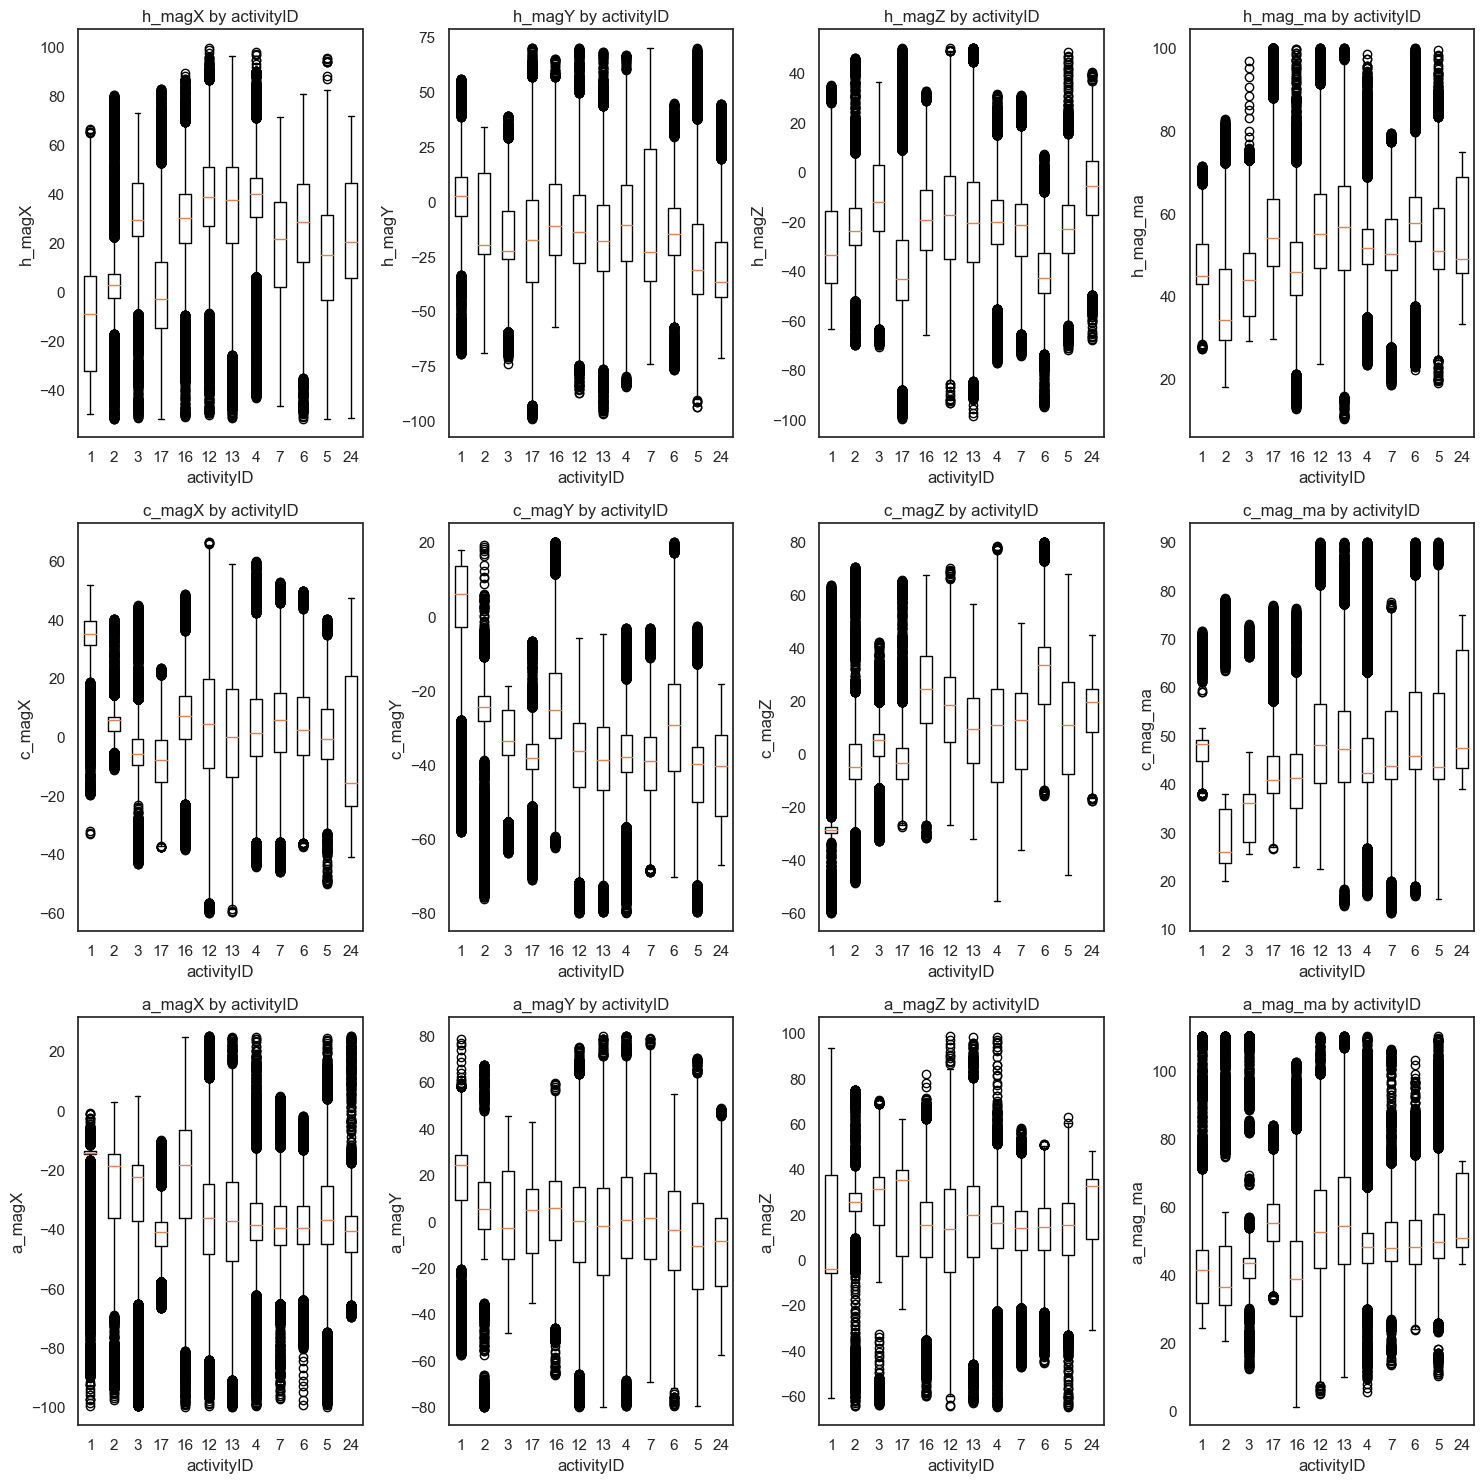

In [86]:
selected_vars = ['h_magX', 'h_magY', 'h_magZ','h_mag_ma', 
                 'c_magX', 'c_magY','c_magZ', 'c_mag_ma',
                 'a_magX','a_magY', 'a_magZ', 'a_mag_ma']

category_var = 'activityID'
num_rows = 3
num_cols = 4
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i, var in enumerate(selected_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    ax.boxplot([df[var][df[category_var] == category] for category in df[category_var].unique()],
               labels=df[category_var].unique())
    ax.set_title(f'{var} by {category_var}')
    ax.set_xlabel(category_var)
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

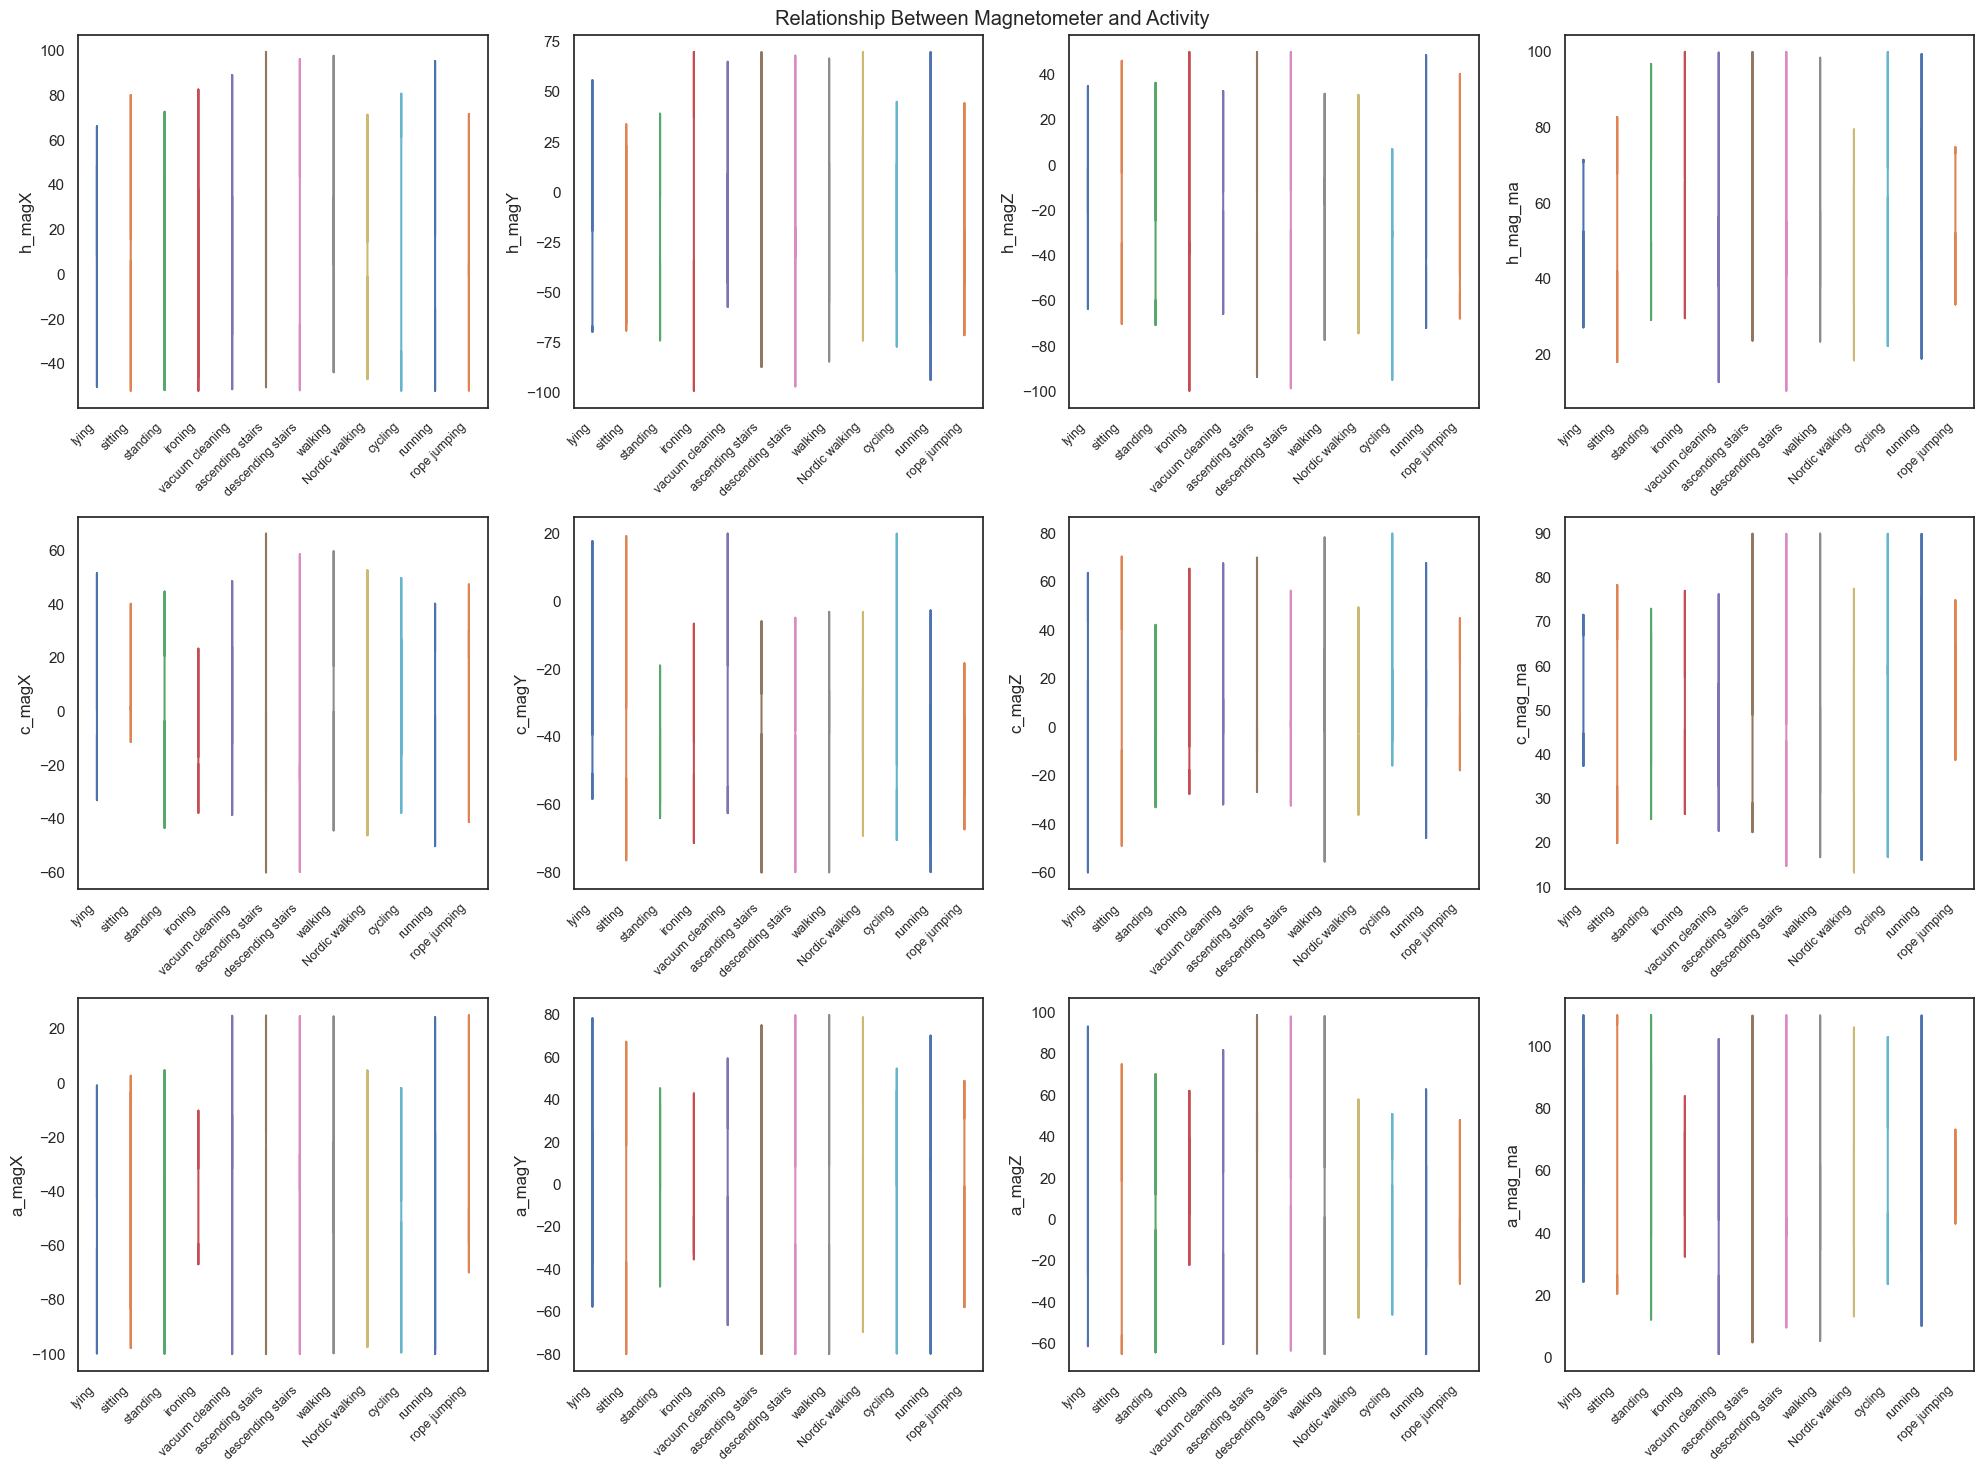

In [77]:
selected_vars = ['h_magX', 'h_magY', 'h_magZ','h_mag_ma', 
                 'c_magX', 'c_magY','c_magZ', 'c_mag_ma',
                 'a_magX','a_magY', 'a_magZ', 'a_mag_ma']
category_var = 'activity_name'

num_rows = 3
num_cols = 4

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

for i, var in enumerate(selected_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    
    for category in df[category_var].unique():
        ax.plot(df[category_var][df[category_var] == category], 
                df[var][df[category_var] == category], label=category)

    ax.set_ylabel(var)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

plt.suptitle('Relationship Between Magnetometer and Activity')
plt.tight_layout()
plt.show()

<font color=black size=3 > &emsp; 6) **Correlation** <br/>
<font color=black size=2 > &emsp;&emsp;&emsp; <br/>

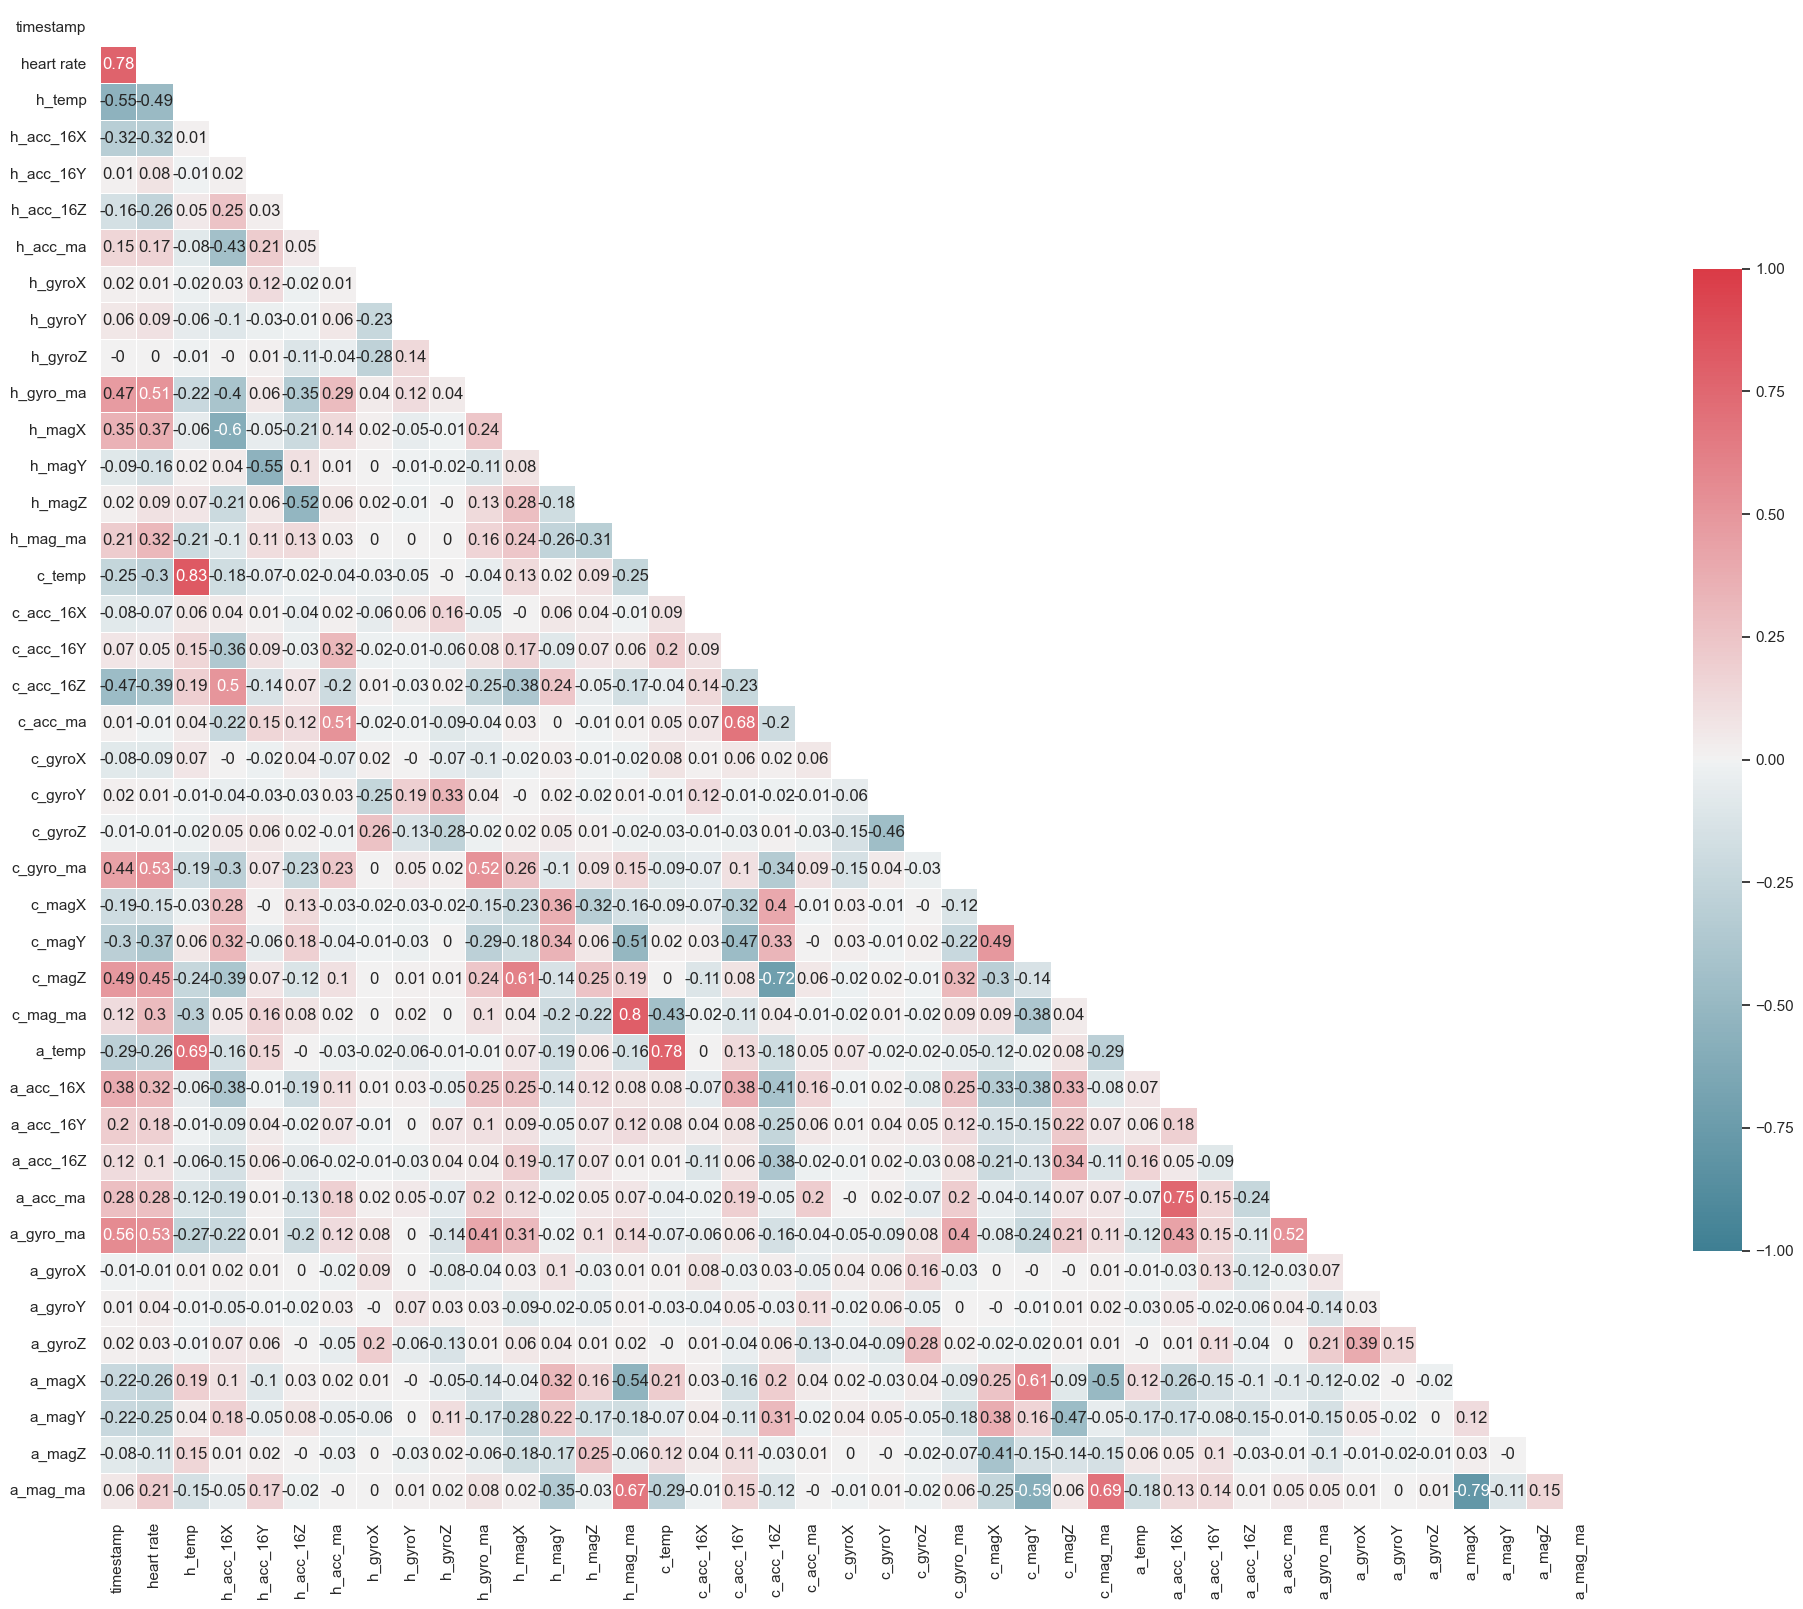

In [87]:
corr = df.corr(numeric_only=True).round(2)
mask = np.zeros_like(corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

<font color=black size=4 >**3.3 Deal with Imbalanced Sample Size**<br/>    
    
<font color=black size=3 >&emsp; 1) Use controlled **under-sampling** techniques to balance sample size

In [90]:
df['subjectID']=df['subjectID'].astype(int)

In [4]:
X = df[['timestamp', 'subjectID',  'heart rate',
       'h_temp', 'h_acc_16X', 'h_acc_16Y', 'h_acc_16Z', 'h_acc_ma', 'h_gyroX',
       'h_gyroY', 'h_gyroZ', 'h_gyro_ma', 'h_magX', 'h_magY', 'h_magZ',
       'h_mag_ma', 'c_temp', 'c_acc_16X', 'c_acc_16Y', 'c_acc_16Z', 'c_acc_ma',
       'c_gyroX', 'c_gyroY', 'c_gyroZ', 'c_gyro_ma', 'c_magX', 'c_magY',
       'c_magZ', 'c_mag_ma', 'a_temp', 'a_acc_16X', 'a_acc_16Y', 'a_acc_16Z',
       'a_acc_ma', 'a_gyro_ma', 'a_gyroX', 'a_gyroY', 'a_gyroZ', 'a_magX',
       'a_magY', 'a_magZ', 'a_mag_ma']]
y = df['activityID']

In [158]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

class_counts = sorted(Counter(y_resampled).items())
print(class_counts)

[(1, 30236), (2, 30236), (3, 30236), (4, 30236), (5, 30236), (6, 30236), (7, 30236), (12, 30236), (13, 30236), (16, 30236), (17, 30236), (24, 30236)]


In [159]:
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['activityID'])], axis=1)
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362832 entries, 0 to 362831
Data columns (total 43 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   362832 non-null  float64
 1   subjectID   362832 non-null  int32  
 2   heart rate  362832 non-null  float64
 3   h_temp      362832 non-null  float64
 4   h_acc_16X   362832 non-null  float64
 5   h_acc_16Y   362832 non-null  float64
 6   h_acc_16Z   362832 non-null  float64
 7   h_acc_ma    362832 non-null  float64
 8   h_gyroX     362832 non-null  float64
 9   h_gyroY     362832 non-null  float64
 10  h_gyroZ     362832 non-null  float64
 11  h_gyro_ma   362832 non-null  float64
 12  h_magX      362832 non-null  float64
 13  h_magY      362832 non-null  float64
 14  h_magZ      362832 non-null  float64
 15  h_mag_ma    362832 non-null  float64
 16  c_temp      362832 non-null  float64
 17  c_acc_16X   362832 non-null  float64
 18  c_acc_16Y   362832 non-null  float64
 19  c_

<font color=black size=3 >&emsp; **2) Check the distribution of resampled dataset**

In [160]:
resampled_df ['activity_name'] =resampled_df ['activityID'].apply(
    lambda x: 'lying' if x == 1 
    else 'sitting' if x == 2  
    else 'standing' if x == 3
    else 'walking' if x == 4
    else 'running' if x == 5
    else 'cycling' if x == 6
    else 'Nordic walking' if x == 7
    else 'watching TV' if x == 9
    else 'computer work' if x == 10
    else 'car driving' if x == 11
    else 'ascending stairs' if x == 12
    else 'descending stairs' if x == 13
    else 'vacuum cleaning' if x == 16
    else 'ironing' if x == 17
    else 'folding laundry' if x == 18
    else 'house cleaning' if x == 19
    else 'playing soccer' if x == 20
    else 'rope jumping' if x == 24
    else 'other')

In [161]:
resampled_df['subjectID']=resampled_df['subjectID'].astype(str)
resampled_df['activityID']=resampled_df['activityID'].astype(str)


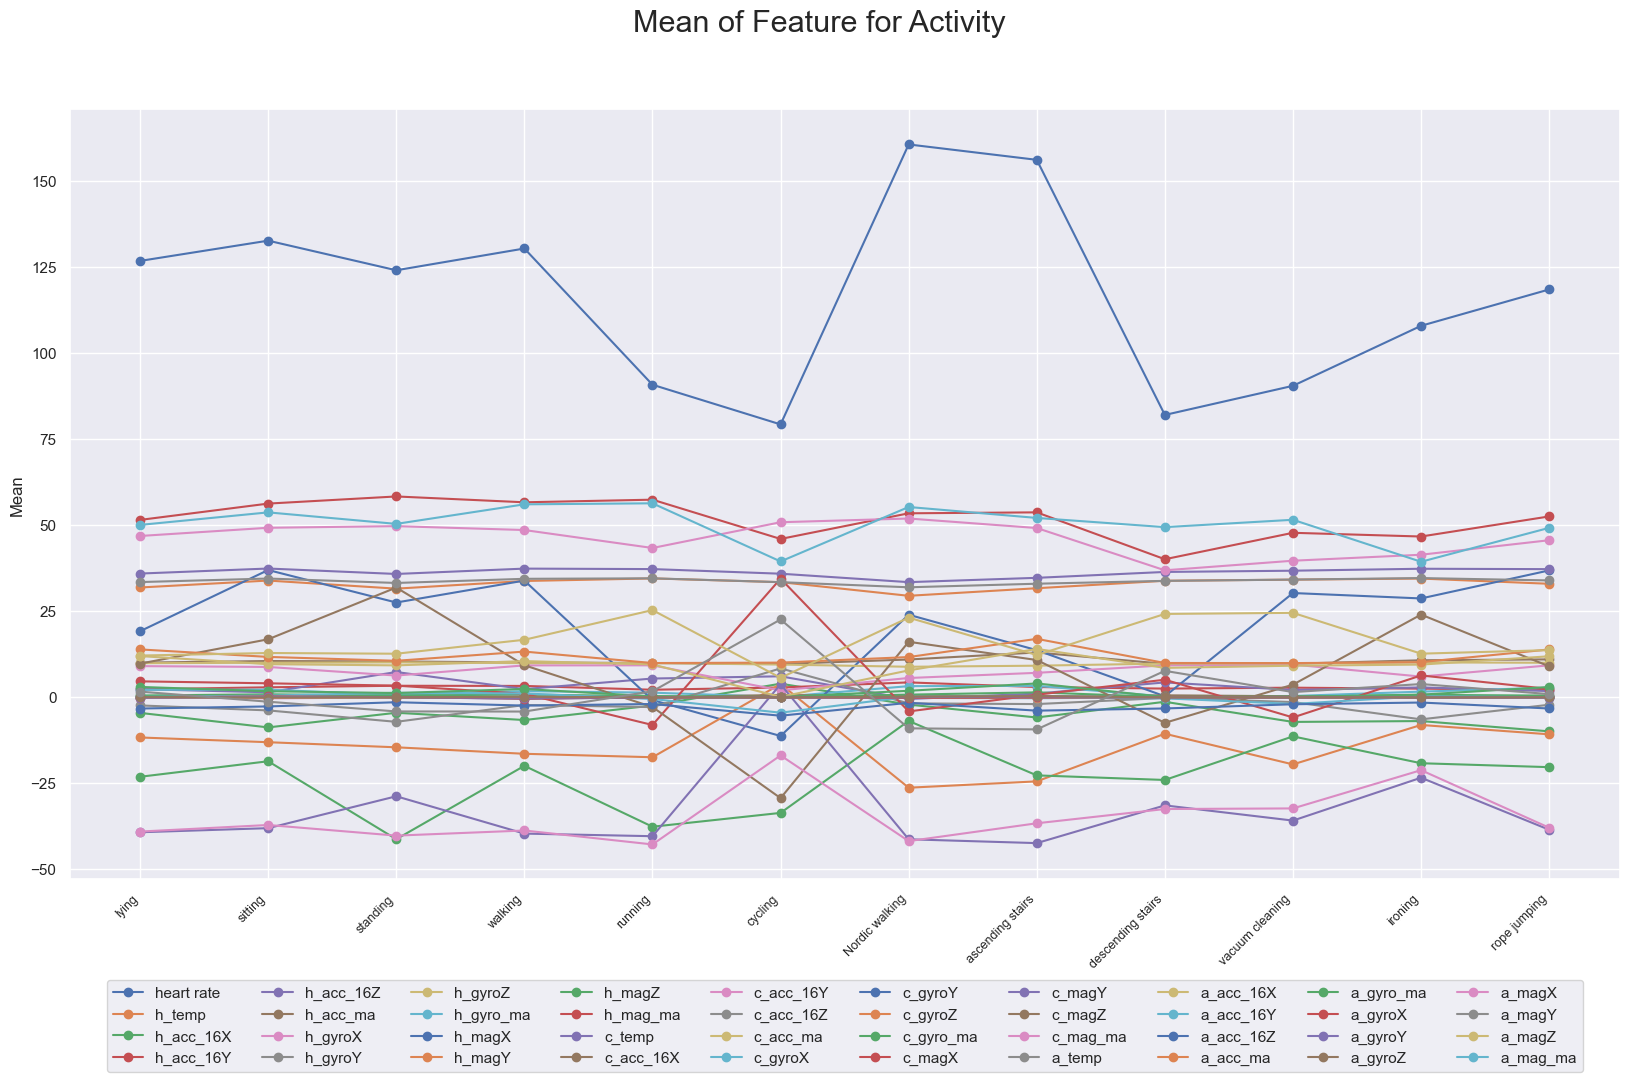

In [102]:
activity=resampled_df['activity_name'].unique()
avg_values = resampled_df.groupby('activity_name').mean(numeric_only='TRUE')
avg_values = avg_values.drop("timestamp", axis=1)
sns.set_style("darkgrid")
plt.figure(figsize=(20, 10)) 
for col in avg_values.columns:
    plt.plot(activity, avg_values[col], marker='o') 

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylabel('Mean')
plt.legend(avg_values.columns, loc='lower center', bbox_to_anchor=(0.5, -0.26), ncol=10)

plt.suptitle('Mean of Feature for Activity',fontsize=22)
  
plt.show()

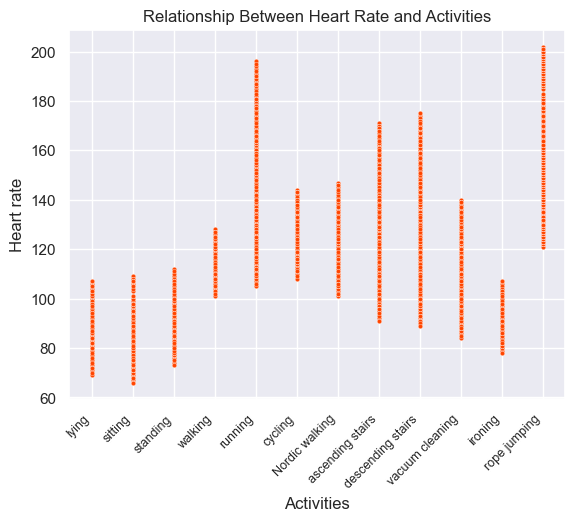

In [104]:
fig, ax = plt.subplots()
sns.scatterplot(data=resampled_df, x='activity_name', y='heart rate',color='orangered',s=9)
ax.set_xlabel('Activities')
ax.set_ylabel('Heart rate')
ax.set_title('Relationship Between Heart Rate and Activities')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.show()

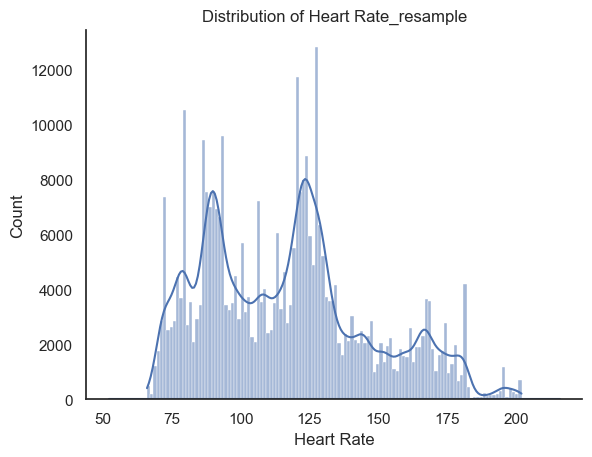

In [107]:
fig, ax = plt.subplots()
sns.histplot(data=resampled_df, x='heart rate',  kde=True)
sns.kdeplot(data=resampled_df, x='heart rate', linestyle='-', bw_adjust=2)
sns.despine()
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Count')
ax.set_title('Distribution of Heart Rate_resample')
plt.show()

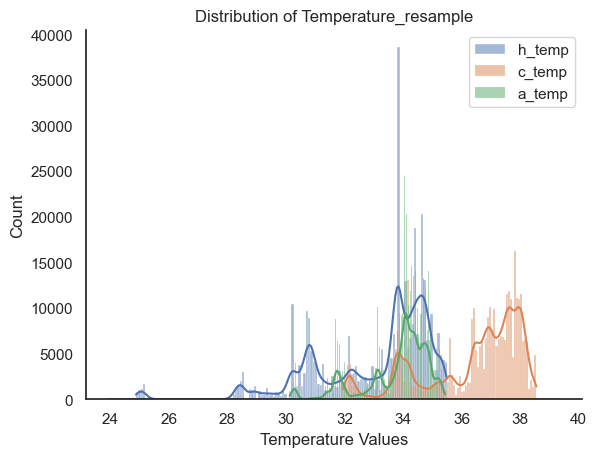

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['h_temp', 'c_temp', 'a_temp']
selected_data = resampled_df[selected_features]

sns.set_style("white")
fig, ax = plt.subplots()
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax, linestyle='-', bw_adjust=2)
sns.despine()
ax.set_xlabel('Temperature Values')
ax.set_ylabel('Count')
ax.set_title('Distribution of Temperature_resample')
ax.legend()
plt.show()

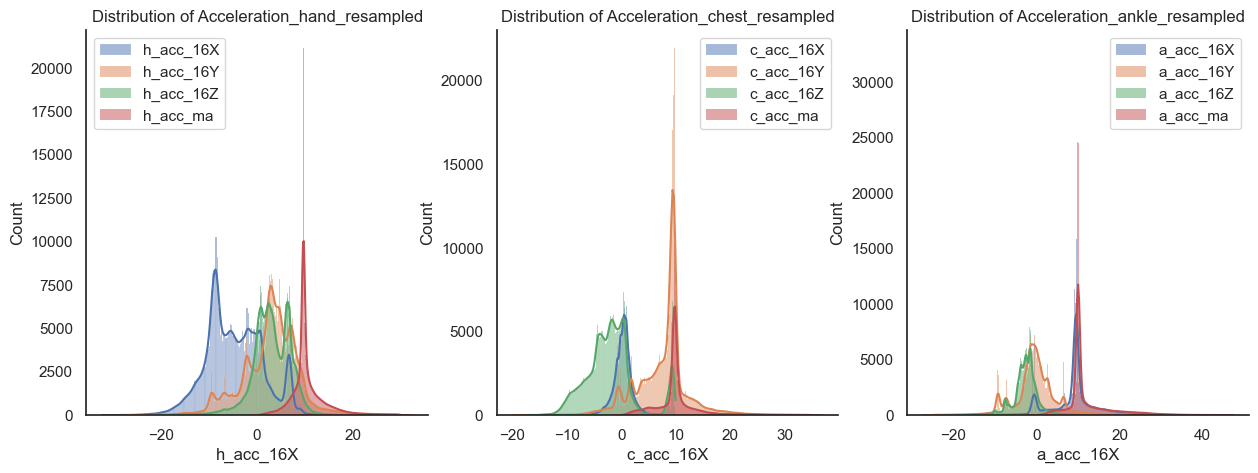

In [109]:
fig = plt.figure(figsize=(15, 5))

selected_features = ['h_acc_16X', 'h_acc_16Y', 'h_acc_16Z', 'h_acc_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax1 = plt.subplot(1, 3, 1)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax1, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax1, linestyle='-', bw_adjust=2)
sns.despine()
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Acceleration_hand_resampled')
ax1.legend()

selected_features = ['c_acc_16X', 'c_acc_16Y', 'c_acc_16Z', 'c_acc_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax2 = plt.subplot(1, 3, 2)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax2, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax2, linestyle='-', bw_adjust=2)
sns.despine()
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Acceleration_chest_resampled')
ax2.legend()

selected_features = ['a_acc_16X', 'a_acc_16Y', 'a_acc_16Z', 'a_acc_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax3 = plt.subplot(1, 3, 3)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax3, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax3, linestyle='-', bw_adjust=2)
sns.despine()
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Acceleration_ankle_resampled')
ax3.legend()

plt.show()


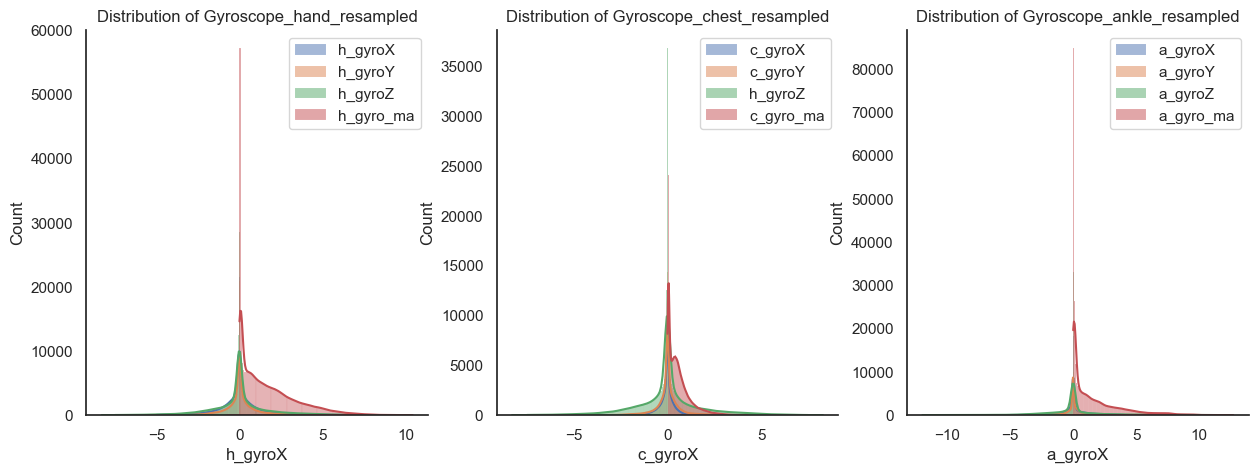

In [111]:
fig = plt.figure(figsize=(15, 5))

selected_features = ['h_gyroX', 'h_gyroY', 'h_gyroZ', 'h_gyro_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax1 = plt.subplot(1, 3, 1)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax1, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax1, linestyle='-', bw_adjust=2)
sns.despine()
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Gyroscope_hand_resampled')
ax1.legend()

selected_features = ['c_gyroX', 'c_gyroY', 'h_gyroZ', 'c_gyro_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax2 = plt.subplot(1, 3, 2)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax2, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax2, linestyle='-', bw_adjust=2)
sns.despine()
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Gyroscope_chest_resampled')
ax2.legend()

selected_features = ['a_gyroX', 'a_gyroY', 'a_gyroZ', 'a_gyro_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax3 = plt.subplot(1, 3, 3)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax3, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax3, linestyle='-', bw_adjust=2)
sns.despine()
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Gyroscope_ankle_resampled')
ax3.legend()

plt.show()


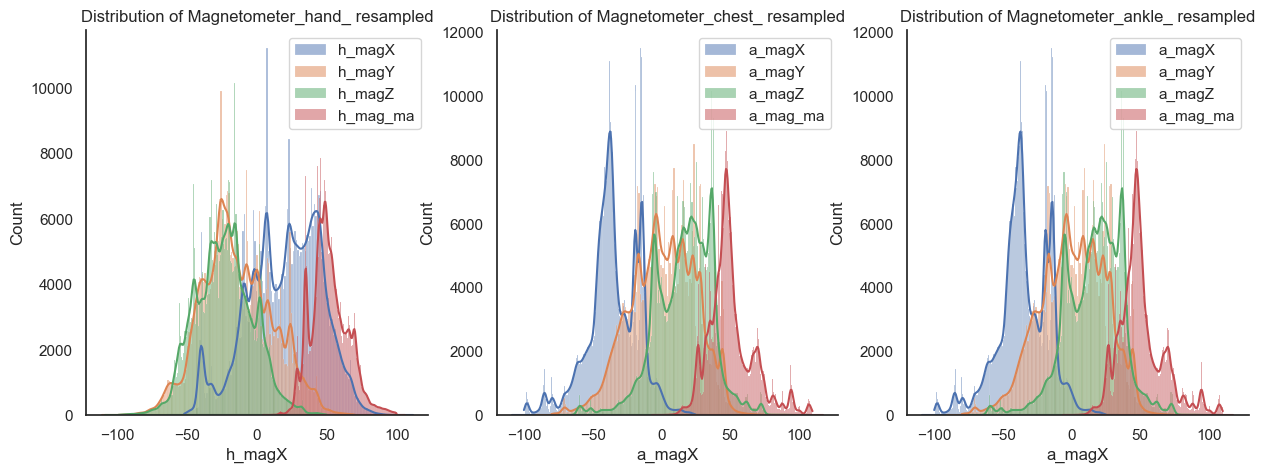

In [112]:
fig = plt.figure(figsize=(15, 5))

selected_features = ['h_magX', 'h_magY', 'h_magZ', 'h_mag_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax1 = plt.subplot(1, 3, 1)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax1, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax1, linestyle='-', bw_adjust=2)
sns.despine()
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Magnetometer_hand_ resampled')
ax1.legend()

selected_features = ['a_magX', 'a_magY', 'a_magZ', 'a_mag_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax2 = plt.subplot(1, 3, 2)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax2, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax2, linestyle='-', bw_adjust=2)
sns.despine()
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Magnetometer_chest_ resampled')
ax2.legend()

selected_features = ['a_magX', 'a_magY', 'a_magZ', 'a_mag_ma']
selected_data = resampled_df[selected_features]

sns.set_style("white")
ax3 = plt.subplot(1, 3, 3)
for feature in selected_features:
    sns.histplot(selected_data[feature], ax=ax3, label=feature, kde=True)
    sns.kdeplot(selected_data[feature], ax=ax3, linestyle='-', bw_adjust=2)
sns.despine()
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Magnetometer_ankle_ resampled')
ax3.legend()

plt.show()


<font color=black size=3 >&emsp; **3) Correlation of Resampled Data**<br/>
<font color=black size=2 >&emsp;&emsp;To reduce the dimention of the features, remove the features with **high correlation**.<br/>
&emsp;&emsp;— Drop the features with |correlation|**>=0.8**: c_temp, h_mag_ma;<br/>
&emsp;&emsp;— Also drop the features with |correlation| **>=0.75**: c_acc_16Y(0.76 with 'c_acc_ma'), a_acc_16X(0.76 with 'a_acc_ma'), a_magX(-0.78 with 'a_mag_ma')

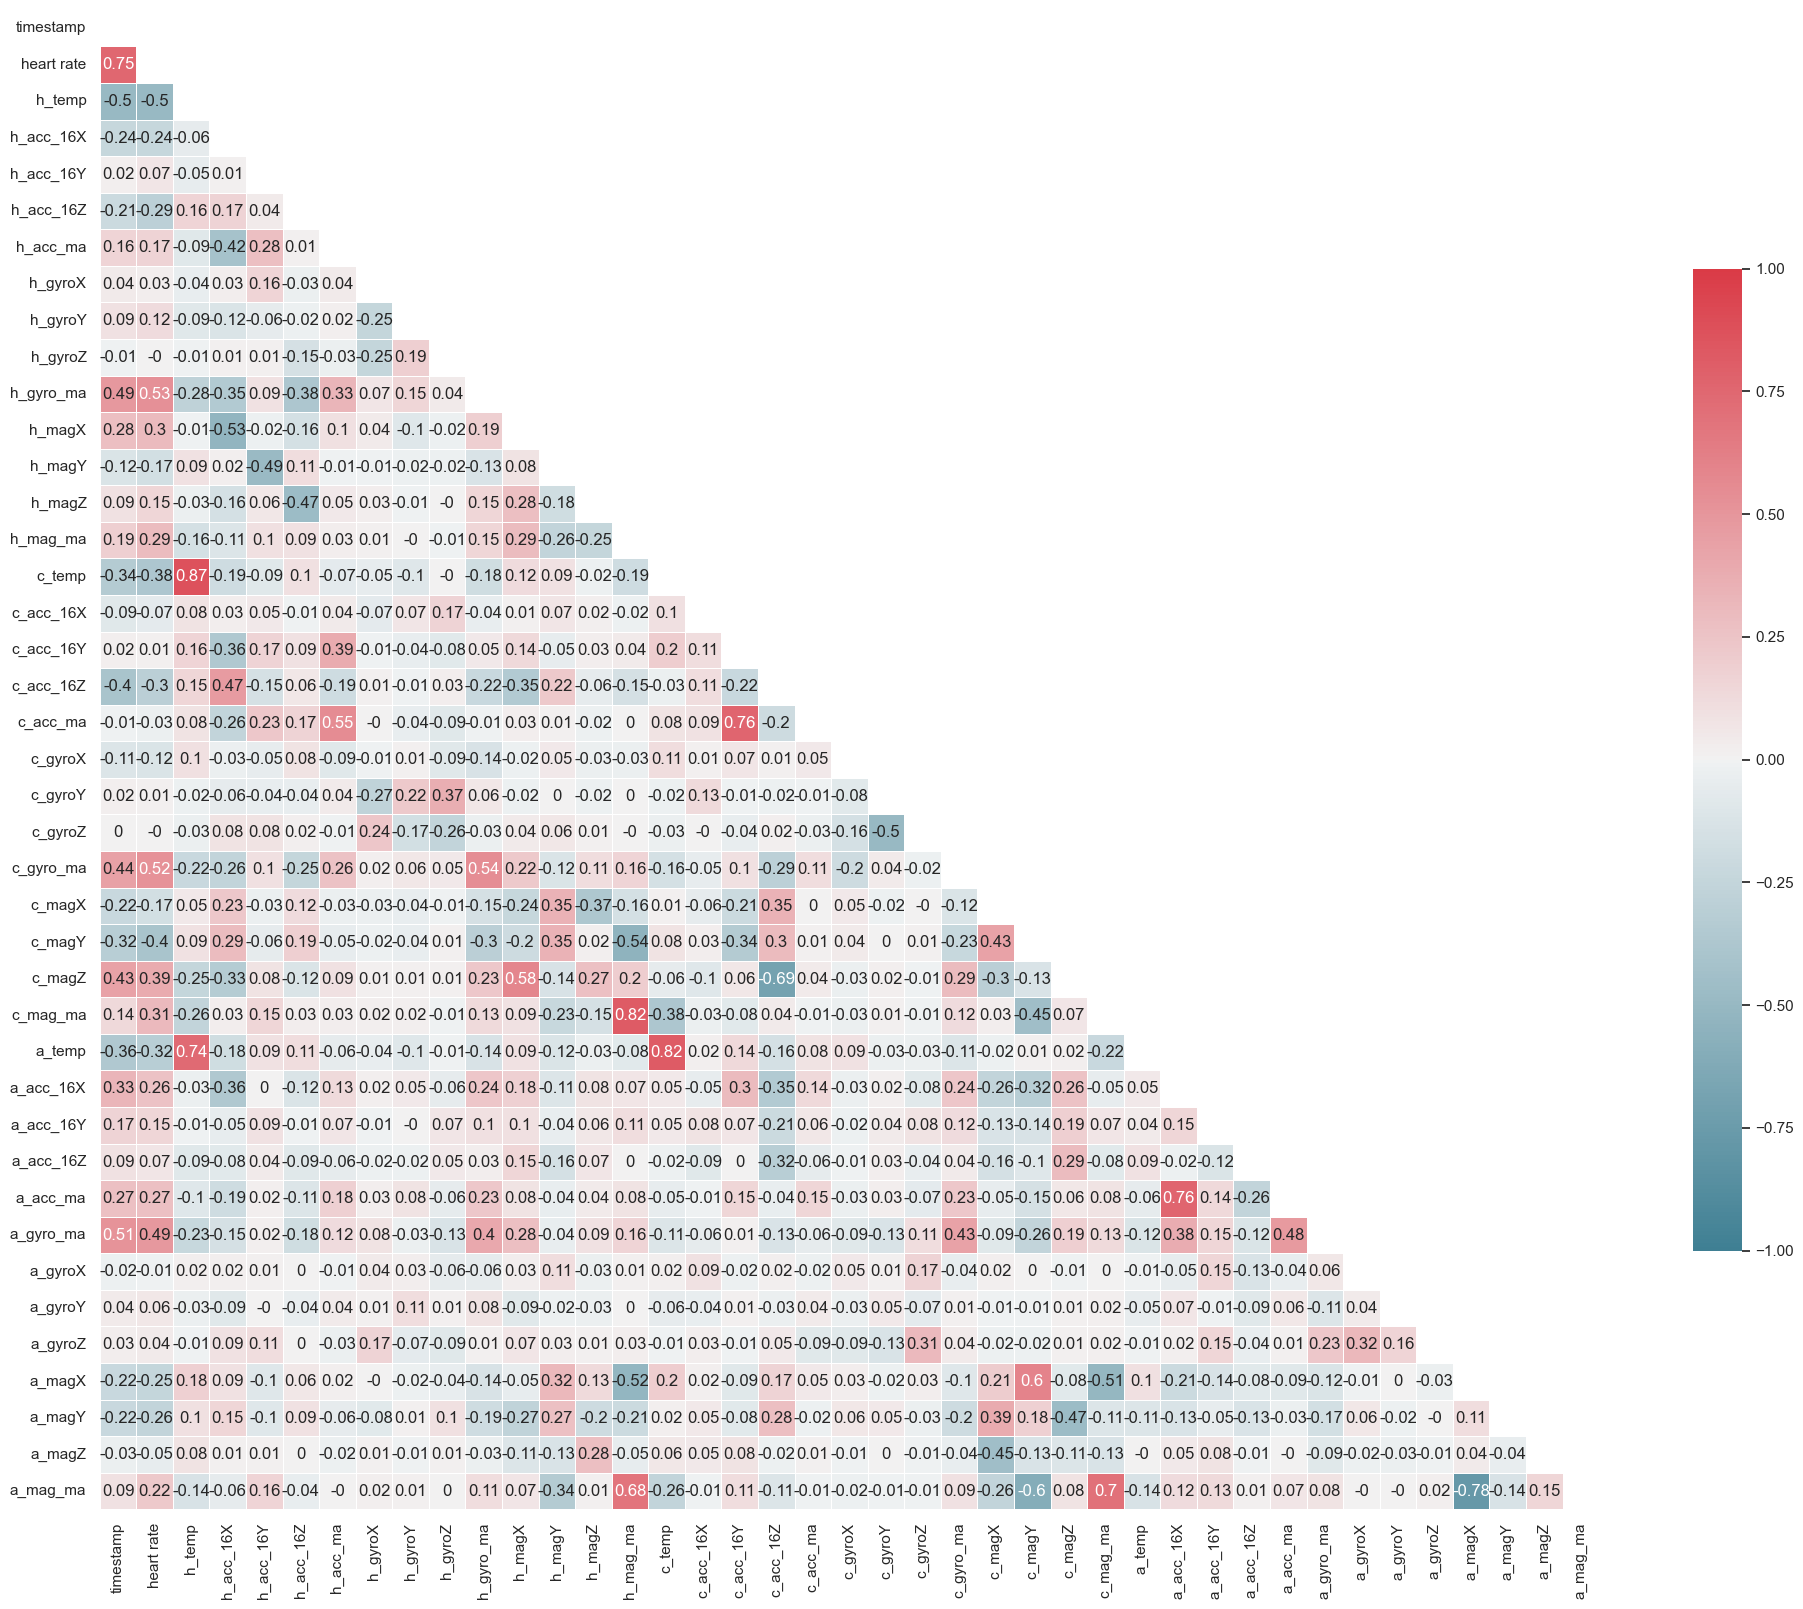

In [162]:
corr = resampled_df.corr(numeric_only=True).round(2)
mask = np.zeros_like(corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [165]:
resampled_df=resampled_df.drop(['c_temp','h_mag_ma','c_acc_16Y', 'a_acc_16X', 'a_magX'], axis=1)

In [166]:
resampled_df

timestamp subjectID  heart rate   h_temp  h_acc_16X  h_acc_16Y  \
0          109.57         5        96.0  34.6875  -8.893050    3.06205   
1           82.82         2        89.0  33.5000   7.033210    3.23784   
2          276.20         8        71.0  34.1875   6.340010   -2.21378   
3          222.29         5        72.0  34.8125   0.755167    7.38502   
4          130.68         2        78.0  33.6250   6.766560    2.55765   
...           ...       ...         ...      ...        ...        ...   
362827      94.56         9       162.0  25.1250   4.223270    6.14412   
362828      94.57         9       162.0  25.1250   4.075590    6.25977   
362829      94.58         9       162.0  25.1250   4.075860    6.10835   
362830      94.59         9       162.0  25.1250   4.073450    5.95626   
362831      94.60         9       162.0  25.1250   4.109100    6.03118   

        h_acc_16Z  h_acc_ma   h_gyroX   h_gyroY  ...   a_acc_ma  a_gyro_ma  \
0         2.20580  9.660644 -0.025945 -0.043594  ...   9.864791   0.027352   
1         6.13855  9.880863  0.020644 -0.035832  ...  10.068874   0.045648   
2         6.87782  9.612542 -0.007162  0.010333  ...  10.161867   0.037973   
3         6.14598  9.637524  0.001774  0.018958  ...  10.144200   0.034005   
4         6.21383  9.536225  0.044216  0.042211  ...  10.130397   0.048020   
...           ...       ...       ...       ...  ...        ...        ...   
362827    6.20212  9.698067 -0.033644 -0.049408  ...   9.814550   0.030596   
362828    6.27649  9.756510 -0.053582 -0.031702  ...   9.834985   0.019076   
362829    6.31549  9.685556 -0.037094 -0.022410  ...   9.922957   0.027878   
362830    6.27748  9.564350 -0.103517 -0.037627  ...   9.918749   0.038206   
362831    6.20079  9.576515 -0.085184 -0.017651  ...   9.981167   0.070332   

         a_gyroX   a_gyroY   a_gyroZ     a_magY     a_magZ   a_mag_ma  \
0      -0.015163  0.018569  0.013167 -50.536300  10.838800  63.687697   
1       0.023609  0.031115  0.023627  22.405600  -5.403890  26.298096   
2      -0.033069 -0.005523 -0.017828   9.085490  38.078800  41.997077   
3       0.021787 -0.024235  0.009712  27.963600  -6.475260  32.073123   
4      -0.047005  0.009811  0.000397  23.832700  -4.521190  27.422662   
...          ...       ...       ...        ...        ...        ...   
362827  0.013664 -0.013217  0.023973  -0.941846  -0.313187  46.178168   
362828  0.006909  0.017599 -0.002539  -0.587394  -0.453218  45.544643   
362829  0.008121 -0.023196 -0.013159  -0.561914  -0.455045  46.055176   
362830  0.014309  0.012105 -0.033293  -0.708540   0.113833  45.662939   
362831  0.065855 -0.001829 -0.024622  -0.946169   0.538293  46.043270   

        activityID  activity_name  
0                1          lying  
1                1          lying  
2                1          lying  
3                1          lying  
4                1          lying  
...            ...            ...  
362827          24   rope jumping  
362828          24   rope jumping  
362829          24   rope jumping  
362830          24   rope jumping  
362831          24   rope jumping  

[362832 rows x 39 columns]

In [167]:
resampled_df.to_csv('0708resampled data.dat', index=False)

<font color=black size=4 >**3.4 Prepare for modeling**<br/>    
    
<font color=black size=3 > &emsp; **1) Reset the  the class labels of activity** (Strat with 0) <br/>
    

In [168]:
resampled_df['activityID'] = resampled_df['activity_name'].apply(
    lambda x: 0  if x == 'lying'
    else 1 if x == 'sitting' 
    else 2 if x == 'standing'
    else 3 if x == 'walking'
    else 4 if x == 'running'
    else 5 if x == 'cycling'
    else 6 if x == 'Nordic walking'
    else 7 if x == 'ascending stairs'
    else 8 if x == 'descending stairs'
    else 9 if x == 'vacuum cleaning'
    else 10 if x == 'ironing'
    else 11 )

<font color=black size=3 > &emsp;**2) Drop unrelavent features** <br/>
<font color=black size=2 > &emsp;&emsp;As the purpose is to predict the type the activity for the given data (heart rate, temperature, acceleration, gyroscope, magnetometer), the features like 'timestamp','subjectID' and 'activity_name' can be removed.<br/>

In [169]:
resampled_df = resampled_df.drop(['timestamp', 'subjectID', 'activity_name'], axis=1)

<font color=black size=3 > &emsp; **3) Shuffling Data points**<br/>
<font color=black size=2 > &emsp;&emsp;- Since the data collection is chronological, I shuffle the dataset to avoid the model learning the sequential correlation.<br/>
&emsp;&emsp;- Shuffling data also improve the generalization ability of the model. <br/>

In [170]:
random.seed(42)
dli = resampled_df .values.tolist()
random.shuffle(dli)
resampled_df = pd.DataFrame(dli, columns=resampled_df .columns)

<font color=black size=3 > &emsp; **4) Covert the data type**<br/>
<font color=black size=2 > &emsp;&emsp;&emsp; – To compressed model size covert the data type that is float64 to float16 if possible.<br/>

In [171]:
resampled_df['activityID'] = resampled_df['activityID'].astype(int)

In [174]:
resampled_df.columns

Index(['heart rate', 'h_temp', 'h_acc_16X', 'h_acc_16Y', 'h_acc_16Z',
       'h_acc_ma', 'h_gyroX', 'h_gyroY', 'h_gyroZ', 'h_gyro_ma', 'h_magX',
       'h_magY', 'h_magZ', 'c_acc_16X', 'c_acc_16Z', 'c_acc_ma', 'c_gyroX',
       'c_gyroY', 'c_gyroZ', 'c_gyro_ma', 'c_magX', 'c_magY', 'c_magZ',
       'c_mag_ma', 'a_temp', 'a_acc_16Y', 'a_acc_16Z', 'a_acc_ma', 'a_gyro_ma',
       'a_gyroX', 'a_gyroY', 'a_gyroZ', 'a_magY', 'a_magZ', 'a_mag_ma',
       'activityID'],
      dtype='object')

In [175]:
# Check if other features can be coverted from float64 to float32
columns_to_check = ['heart rate', 'h_temp', 'h_acc_16X', 'h_acc_16Y', 'h_acc_16Z',
       'h_acc_ma', 'h_gyroX', 'h_gyroY', 'h_gyroZ', 'h_gyro_ma', 'h_magX',
       'h_magY', 'h_magZ', 'c_acc_16X', 'c_acc_16Z', 'c_acc_ma', 'c_gyroX',
       'c_gyroY', 'c_gyroZ', 'c_gyro_ma', 'c_magX', 'c_magY', 'c_magZ',
       'c_mag_ma', 'a_temp', 'a_acc_16Y', 'a_acc_16Z', 'a_acc_ma', 'a_gyro_ma',
       'a_gyroX', 'a_gyroY', 'a_gyroZ', 'a_magY', 'a_magZ', 'a_mag_ma']

for column in columns_to_check:
    data_type = resampled_df[column].dtype
    if data_type == 'float64':
        print(f"Data type of column '{column}' is float64.")
        # Check if the values can be safely represented as float32
        if df[column].min() >= np.finfo(np.float16).min and df[column].max() <= np.finfo(np.float16).max:
            print("Values can be safely represented as float16.")
        else:
            print("Values may lose precision if converted to float16.")
    else:
        print(f"Data type of column '{column}' is not float64.")

Data type of column 'heart rate' is float64.
Values can be safely represented as float16.
Data type of column 'h_temp' is float64.
Values can be safely represented as float16.
Data type of column 'h_acc_16X' is float64.
Values can be safely represented as float16.
Data type of column 'h_acc_16Y' is float64.
Values can be safely represented as float16.
Data type of column 'h_acc_16Z' is float64.
Values can be safely represented as float16.
Data type of column 'h_acc_ma' is float64.
Values can be safely represented as float16.
Data type of column 'h_gyroX' is float64.
Values can be safely represented as float16.
Data type of column 'h_gyroY' is float64.
Values can be safely represented as float16.
Data type of column 'h_gyroZ' is float64.
Values can be safely represented as float16.
Data type of column 'h_gyro_ma' is float64.
Values can be safely represented as float16.
Data type of column 'h_magX' is float64.
Values can be safely represented as float16.
Data type of column 'h_magY' is f

In [176]:
# All features with data type 'float64' can be safely coverted to 'float16'
for column in columns_to_check:
     resampled_df[column] = resampled_df[column].astype(np.float16)
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362832 entries, 0 to 362831
Data columns (total 36 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   heart rate  362832 non-null  float16
 1   h_temp      362832 non-null  float16
 2   h_acc_16X   362832 non-null  float16
 3   h_acc_16Y   362832 non-null  float16
 4   h_acc_16Z   362832 non-null  float16
 5   h_acc_ma    362832 non-null  float16
 6   h_gyroX     362832 non-null  float16
 7   h_gyroY     362832 non-null  float16
 8   h_gyroZ     362832 non-null  float16
 9   h_gyro_ma   362832 non-null  float16
 10  h_magX      362832 non-null  float16
 11  h_magY      362832 non-null  float16
 12  h_magZ      362832 non-null  float16
 13  c_acc_16X   362832 non-null  float16
 14  c_acc_16Z   362832 non-null  float16
 15  c_acc_ma    362832 non-null  float16
 16  c_gyroX     362832 non-null  float16
 17  c_gyroY     362832 non-null  float16
 18  c_gyroZ     362832 non-null  float16
 19  c_

<font color=black size=3 > &emsp; **5) Feature Scaling**<br/>
<font color=black size=2 > &emsp;&emsp;&emsp;- Choose **standardization** to scale features. (Scales features to have a mean of 0 and standard deviation of 1.) <br/> 
&emsp;&emsp;&emsp;Ensure that features have similar scales while retaining the distribution information of the original data. <br/>
&emsp;&emsp;&emsp;Features in a dataset have different scales. If the features have vastly different magnitudes, some algorithms may give more importance to the features with larger values, regardless of their actual predictive power. Scaling the features brings them to a similar range, preventing this bias.

In [177]:
from sklearn.preprocessing import StandardScaler
feature_cols = [col for col in resampled_df.columns if col != 'activityID']
scaler = StandardScaler()
resampled_df[feature_cols] = scaler.fit_transform(resampled_df[feature_cols])

In [178]:
resampled_df.describe()

heart rate         h_temp      h_acc_16X      h_acc_16Y  \
count  362832.000000  362832.000000  362832.000000  362832.000000   
mean       -0.000000      -0.000000      -0.000000       0.000000   
std         0.000000       0.000000       0.000000       0.000000   
min        -1.694336      -4.074219      -4.265625      -4.761719   
25%        -0.859375      -0.673340      -0.710938      -0.542969   
50%        -0.024719       0.387939      -0.089294       0.076172   
75%         0.542969       0.730957       0.694824       0.625488   
max         2.845703       1.230469       3.841797       4.609375   

           h_acc_16Z       h_acc_ma        h_gyroX        h_gyroY  \
count  362832.000000  362832.000000  362832.000000  362832.000000   
mean       -0.000000      -0.000000      -0.000000       0.000000   
std         0.000000       0.000000       0.000000       0.000000   
min        -5.421875      -2.929688      -3.900391      -5.617188   
25%        -0.594727      -0.376221      -0.362061      -0.331055   
50%        -0.024857      -0.212036      -0.036835      -0.075378   
75%         0.781250       0.238647       0.298828       0.259277   
max         3.828125       5.531250       5.378906       5.949219   

             h_gyroZ      h_gyro_ma  ...      a_acc_16Z       a_acc_ma  \
count  362832.000000  362832.000000  ...  362832.000000  362832.000000   
mean        0.000000       0.000000  ...      -0.000000       0.000000   
std         0.000000       0.000000  ...       0.000000       0.000000   
min        -4.371094      -1.017578  ...      -5.832031      -2.250000   
25%        -0.322266      -0.845215  ...      -0.414551      -0.388184   
50%        -0.003341      -0.281006  ...       0.072876      -0.346436   
75%         0.270264       0.543457  ...       0.505859       0.090149   
max         4.371094       4.804688  ...       4.281250       6.292969   

           a_gyro_ma        a_gyroX        a_gyroY        a_gyroZ  \
count  362832.000000  362832.000000  362832.000000  362832.000000   
mean       -0.000000      -0.000000      -0.000000      -0.000000   
std         0.000000       0.000000       0.000000       0.000000   
min        -0.805664      -4.632812      -4.902344      -5.105469   
25%        -0.770020      -0.242798      -0.169556      -0.260742   
50%        -0.397461       0.017189      -0.013859      -0.032104   
75%         0.404297       0.198364       0.305420       0.072021   
max         5.218750       3.732422       4.867188       5.242188   

              a_magY         a_magZ       a_mag_ma     activityID  
count  362832.000000  362832.000000  362832.000000  362832.000000  
mean        0.000000       0.000000      -0.000000       5.500000  
std         0.000000       0.000000       0.000000       3.452057  
min        -3.421875      -3.976562      -3.007812       0.000000  
25%        -0.724121      -0.716797      -0.588867       2.750000  
50%         0.024483       0.095215      -0.160400       5.500000  
75%         0.744629       0.719238       0.421143       8.250000  
max         3.322266       4.000000       3.656250      11.000000  

[8 rows x 36 columns]

In [179]:
resampled_df

heart rate    h_temp  h_acc_16X  h_acc_16Y  h_acc_16Z  h_acc_ma  \
0        -1.327148  0.637207   0.730957  -2.253906  -1.164062 -0.029999   
1         0.509277  0.512207  -0.998535  -0.814941  -1.309570  0.096497   
2        -0.058105  0.387939  -1.203125   0.278076  -1.052734  0.584961   
3        -1.327148  0.762207  -0.771973  -1.033203  -0.650391 -0.225342   
4         0.342529 -0.642090  -0.821289   0.650391   0.902832  0.798340   
...            ...       ...        ...        ...        ...       ...   
362827    2.345703 -1.109375   2.429688  -1.493164   0.314697  0.438477   
362828    0.442627  0.387939   1.939453   0.413818  -0.319092 -0.498291   
362829   -1.427734  0.418945   1.916016  -0.836914   0.973145 -0.220947   
362830   -1.327148  0.387939   0.531250   0.640137   1.023438 -0.205322   
362831    1.376953 -1.421875   0.206665   0.904297  -2.003906 -0.145386   

         h_gyroX   h_gyroY   h_gyroZ  h_gyro_ma  ...  a_acc_16Z  a_acc_ma  \
0      -0.623535 -0.685547  0.575195  -0.185669  ...   0.033356 -0.365723   
1      -0.390381 -1.619141 -1.380859   0.703613  ...  -0.575195  0.012680   
2      -2.240234  1.382812  2.107422   1.891602  ...   0.526367 -0.197388   
3      -0.062469 -0.227051 -0.084473  -0.894043  ...  -0.584473 -0.335938   
4       0.604004 -0.199829  0.390625  -0.375000  ...   0.904297 -1.909180   
...          ...       ...       ...        ...  ...        ...       ...   
362827 -2.498047 -3.035156  0.789551   1.716797  ...  -0.073303 -0.288330   
362828  1.246094 -1.862305 -0.878906   0.700195  ...  -1.294922  2.041016   
362829 -0.045166 -0.104553  0.002220  -1.002930  ...  -1.610352 -0.361328   
362830 -0.026642 -0.077515 -0.004398  -1.009766  ...   0.422852 -0.373291   
362831  2.277344 -0.585938  1.905273   1.665039  ...   0.117004 -0.392578   

        a_gyro_ma   a_gyroX   a_gyroY   a_gyroZ    a_magY    a_magZ  a_mag_ma  \
0       -0.777344  0.055603 -0.063232 -0.039795  0.651855  0.431396 -0.912109   
1       -0.260010  0.345947 -0.462646 -0.475342  0.249878  1.685547  0.424805   
2       -0.573730 -0.053284 -0.025803 -0.239746  0.863281  0.594238  2.603516   
3       -0.765137 -0.028656 -0.074280 -0.056000 -0.105286 -0.229980 -0.687988   
4        0.187622  0.695801  0.058533  0.802246 -0.483887 -1.465820  0.955078   
...           ...       ...       ...       ...       ...       ...       ...   
362827   3.988281 -0.892090 -4.546875 -4.101562  1.942383 -0.678711 -0.127930   
362828   3.507812  1.682617  2.816406  3.673828  0.776855  0.315918 -0.026535   
362829  -0.789551  0.042694 -0.000510 -0.035980  0.317627  1.105469 -0.485596   
362830  -0.791504  0.029160 -0.044891 -0.024826 -0.220947  0.231201 -1.465820   
362831  -0.146606 -0.187012  0.523438  0.531250 -1.680664  0.832031  1.161133   

        activityID  
0                1  
1                7  
2                7  
3                2  
4                5  
...            ...  
362827           4  
362828           4  
362829           0  
362830           1  
362831          11  

[362832 rows x 36 columns]

In [180]:
# Save the balance dataset for modeling
resampled_df.to_csv('0708resampled data_scaling.dat', index=False)

<font color=black size=3 >&emsp;**6) Random select 5000 data points to practice modeling** <br/>
<font color=black size=2 > &emsp; &emsp; Since the data set is too large for computer to modeling, I random select 5000 data points to practice modeling.<br/>

In [181]:
df_sample=resampled_df.sample(n=5000, random_state=42)

In [182]:
activity_counts=df_sample.groupby(['activityID']).size().reset_index(name='count')
print(activity_counts)

    activityID  count
0            0    393
1            1    419
2            2    438
3            3    409
4            4    393
5            5    439
6            6    420
7            7    404
8            8    391
9            9    432
10          10    432
11          11    430


In [183]:
df_sample

heart rate    h_temp  h_acc_16X  h_acc_16Y  h_acc_16Z  h_acc_ma  \
351113   -0.258545  0.917969   0.023758  -0.161987  -0.379395 -1.526367   
37704     0.242310 -1.140625   0.447998  -1.616211   0.052979 -0.822754   
299576   -1.527344  0.512207   1.907227  -0.862793   0.942871 -0.243042   
213192   -1.360352  0.637207   0.486816  -2.125000  -0.616211 -0.218628   
35924    -0.058105  0.543457  -2.027344  -0.782227  -0.442383  1.750977   
...            ...       ...        ...        ...        ...       ...   
317382    1.611328  0.356689  -0.395508   0.270264  -0.282227 -0.576172   
348320   -0.024719  0.044617  -1.620117  -0.473389   0.672852  1.346680   
256998    1.510742  0.387939  -1.016602   0.171631  -0.196655  0.287598   
355455   -0.925781  1.136719   0.355225   0.098816   1.359375 -0.316406   
221119    0.108826 -1.171875   0.270508  -3.210938   0.096680  1.714844   

         h_gyroX   h_gyroY   h_gyroZ  h_gyro_ma  ...  a_acc_16Z  a_acc_ma  \
351113  0.074524 -1.062500  0.512207  -0.224487  ...  -0.456787  0.633789   
37704  -0.546875  0.507324  1.143555   0.278564  ...   0.044586 -1.422852   
299576 -0.067932 -0.121399 -0.004654  -0.982422  ...  -1.635742 -0.364258   
213192 -0.032776 -0.053101 -0.001567  -0.999023  ...   0.033356 -0.376221   
35924   0.693359  0.542480  0.596680  -0.101440  ...   0.249756  2.478516   
...          ...       ...       ...        ...  ...        ...       ...   
317382  2.736328 -0.958984 -0.486084   1.257812  ...  -0.126709 -1.478516   
348320  0.069092  1.069336 -2.650391   1.808594  ...  -0.086548 -1.365234   
256998 -0.497314 -0.138672  2.060547   1.141602  ...   0.020187 -0.233154   
355455 -0.453613  1.067383  0.670898   0.012131  ...   0.379639 -0.394043   
221119  0.060486 -0.025558 -0.662598  -0.328125  ...  -0.141235 -0.489502   

        a_gyro_ma   a_gyroX   a_gyroY   a_gyroZ    a_magY    a_magZ  a_mag_ma  \
351113   0.731445 -0.584961 -1.875000 -1.251953 -1.227539  1.377930  0.346436   
37704    1.540039 -1.803711 -1.810547 -1.864258  1.853516 -0.742676 -0.078186   
299576  -0.780273  0.024048  0.051147 -0.023071  0.328857  1.029297 -0.560059   
213192  -0.785645  0.039337 -0.050049 -0.022995  0.612793  0.445068 -0.937012   
35924    0.208008  1.656250 -0.729980 -0.382080 -0.194946  0.533203 -0.225464   
...           ...       ...       ...       ...       ...       ...       ...   
317382   0.797363  1.805664  1.559570 -1.058594 -1.003906 -0.766113 -0.135620   
348320  -0.039642 -0.269287 -0.616211  0.619629 -1.865234 -1.687500 -0.181519   
256998  -0.625977  0.082642  0.010109  0.127930 -0.493408 -0.241821  0.170532   
355455  -0.764160 -0.055267  0.006714 -0.018204  1.304688  0.349609  0.589844   
221119   0.236572  0.840820 -0.126343  0.817383 -0.696289  0.020309 -0.235107   

        activityID  
351113           8  
37704            6  
299576           0  
213192           1  
35924            8  
...            ...  
317382           7  
348320           3  
256998           7  
355455          10  
221119           6  

[5000 rows x 36 columns]

In [185]:
df_sample.to_csv('0708df_sample.dat', index=False)